# CCE5108 - Data Science In Python
# Assignment 2: Machine learning pipeline and hyperparamter optimization

## Prerequisite - Importing Required Python Libraries

In [47]:
#Pandas toolkit to be used for data analysis
import pandas as pd
#Matplotlib and Seaborn to be used for visualization
import matplotlib.pyplot as plt
import seaborn as sns
#NumPy and SciPy to be used for numeric and data manipulation
import numpy as np
import scipy as stats
from scipy import stats
from scipy.stats import describe
#scikit-learn for predictive data analysis (To be )
import sklearn
#Importing StandardScaler function from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
#Importing PCA from sklearn.decomposition
from sklearn.decomposition import PCA
#Import SVM regressor
from sklearn.svm import SVR
#Importing Pipeline from sklearn.pipeline
from sklearn.pipeline import Pipeline
#Importing train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

#Import Mean_Absolute_Error metric
from sklearn.metrics import mean_absolute_error
#Import Mean_Squared_Error metric (Also used for RMSE)
from sklearn.metrics import mean_squared_error
#Import R^2 Score
from sklearn.metrics import r2_score
#Import GridSearchCV
from sklearn.model_selection import GridSearchCV
#Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
#Import StratifiedKFold
from sklearn.model_selection import StratifiedKFold


## Task 1 - Data exploration (10 marks)

<b> Load the white wine dataset from the Wine Quality Dataset

In [48]:
#Loading White Wine Data
White_Wine = pd.read_csv('C:\\Users\\Owner\\Desktop\\CCE5108 - Data Science in Python\\Assignment 2 - Machine learning pipeline and hyperparameter optimization\\winequality-white.csv',delimiter=';')

<b> Conduct a brief exploratory data analysis to explore the distribution of the data and how the features relate to each other. Use appropriate visualization

Let us first obtain an excrept of the white wine dataset together with a short summary of this dataset using 'DataFrame.info()'

In [49]:
#Obtaining excrept of white wine dataset
White_Wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

In [50]:
#Obtaining brief summary of white wine dataset
White_Wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


From the above it can be seen that we have a total of 12 variables. From these 12 variables, it is stated in the assignment sheet that wine quality will be the target feature implying that the remaining variables are our predictive features. All predictive features are continuous whilst the target features is an ordinal variable [1]. Indeed, all predictive feature entries are of a floating-point number (float64) data type whilst target feature entries are of a int64 (integer) data type. A brief description of our features is as follows:

1. Fixed acidity - Acids in wine which do not evaporate easily (Tartaric acid) [2]. Measured in $g/dm^{3}$ [3]. 

2. Volatile acidity - Measurement of acetic acid [2]. Measured in $g/dm^{3}$ [3].

3. Citric acid - Measurement of citric acid [2]. Measured in $g/dm^{3}$ [3].

4. Residual sugar - Measurement of remaining sugar following fermentation process [2]. Measured in $g/dm^{3}$ [3].

5. Chlorides -Measurement of Sodium Chloride (salt) in wine [2]. Measured in $g/dm^{3}$ [3]. 

6. Free sulfur dioxide - Measurement of sulfur dioxide (SO2) in its molecular (SO2) and bisulfite (HSO3) forms [2]. Measured in $mg/dm^{3}$ [3]. 

7. Total sulfur dioxide - Aggregation of free and bound SO2. The term bound implies that the SO2 has been utilised in some form of reaction and can no longer be utilised in any other reactions [2]. Measured in $mg/dm^{3}$ [3]. 

8. Density - The density of wine [2]. Measured in $g/cm^{3}$ [3].

9. pH - Measurement of acidity of wine based on pH scale. pH scale has a range from 0 to 14 with a value of 7 implying a neutral substance whilst values approaching 0 and 14 imply increasingly acidic and alkaline substances respectively [2]. No measurement units.

10. Sulphates - Measurement of potassium sulphate added to wine [2].  Measured in $g/cm^{3}$ [3].

11. Alcohol - The alcohol level in wine, measured as a percentage [3]

12. Quality (Target Feature) - Scale ranging from 0 (very bad) to 10 (excellent) used to grade the taste of wine. For each sample (equivalent to one row in Dataset), three blind tasters rated wine according to this scale and the median of these three values was utilised as the Quality measurement [3].

In addition, from the above brief summary we can see that the white wine dataset has a total of 4898 entries and all features have a total of 4898 entries implying no missing values. We will ba making use of the 'seaborn.heatmap()' function to visually represent this lack of missing values

[Text(0.5, 1.0, 'Missing Values In White Wine Dataset'),
 Text(0.5, 23.52222222222222, 'Feature Name'),
 Text(50.722222222222214, 0.5, 'Index')]

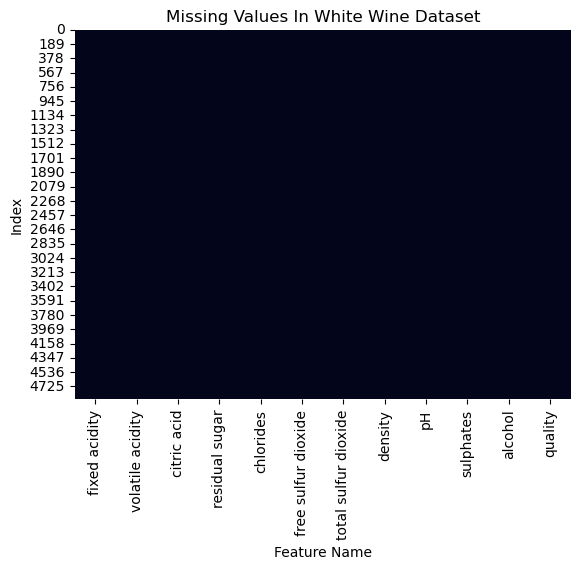

In [51]:
#Create Heatmap plot with index on y-axis and feature name on x-axis
ax = sns.heatmap(White_Wine.isnull(), cbar=False)
#Set title, x-label and y-label of Heatmap
ax.set(title = "Missing Values In White Wine Dataset", xlabel="Feature Name", ylabel="Index")

The absence of missing values is apparent in the above heatmap visualisation since the entire visualisation is filled-in.

To make use of general programming convention we will also remove any spaces from our feature names. Any space will be replaced with an underscore such that:
1. fixed acidity becomes fixed_acidity
2. volatile acidity becomes volatile_acidity
3. citric acid becomes citric_acid
4. residual sugar becomes residual_sugar
5. free sulfur dioxide becomes free_sulfur_dioxide
6. total sulfur dioxide becomes total_sulfur_dioxide

In [52]:
#Renaming features to remove spaces (Only feature names mentioned above were changed)
White_Wine.rename(columns={"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity", "citric acid":"citric_acid", "residual sugar":"residual_sugar",
                           "free sulfur dioxide":"free_sulfur_dioxide","total sulfur dioxide":"total_sulfur_dioxide"}, inplace = True)

In [53]:
#Recall Dataset to show change in feature names
White_Wine

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

We will now explore the distribution of the data. To do so we will plot a histogram for each feature in the white wine dataset and obtain minimum, 1st quartile, median, 3rd quartile, maximum, mean, variance, standard deviation, skewness and kurtosis descriptive statistics for each feature (All these descriptive statistics have been described in Assignment 1: Data Analysis and Visualization).

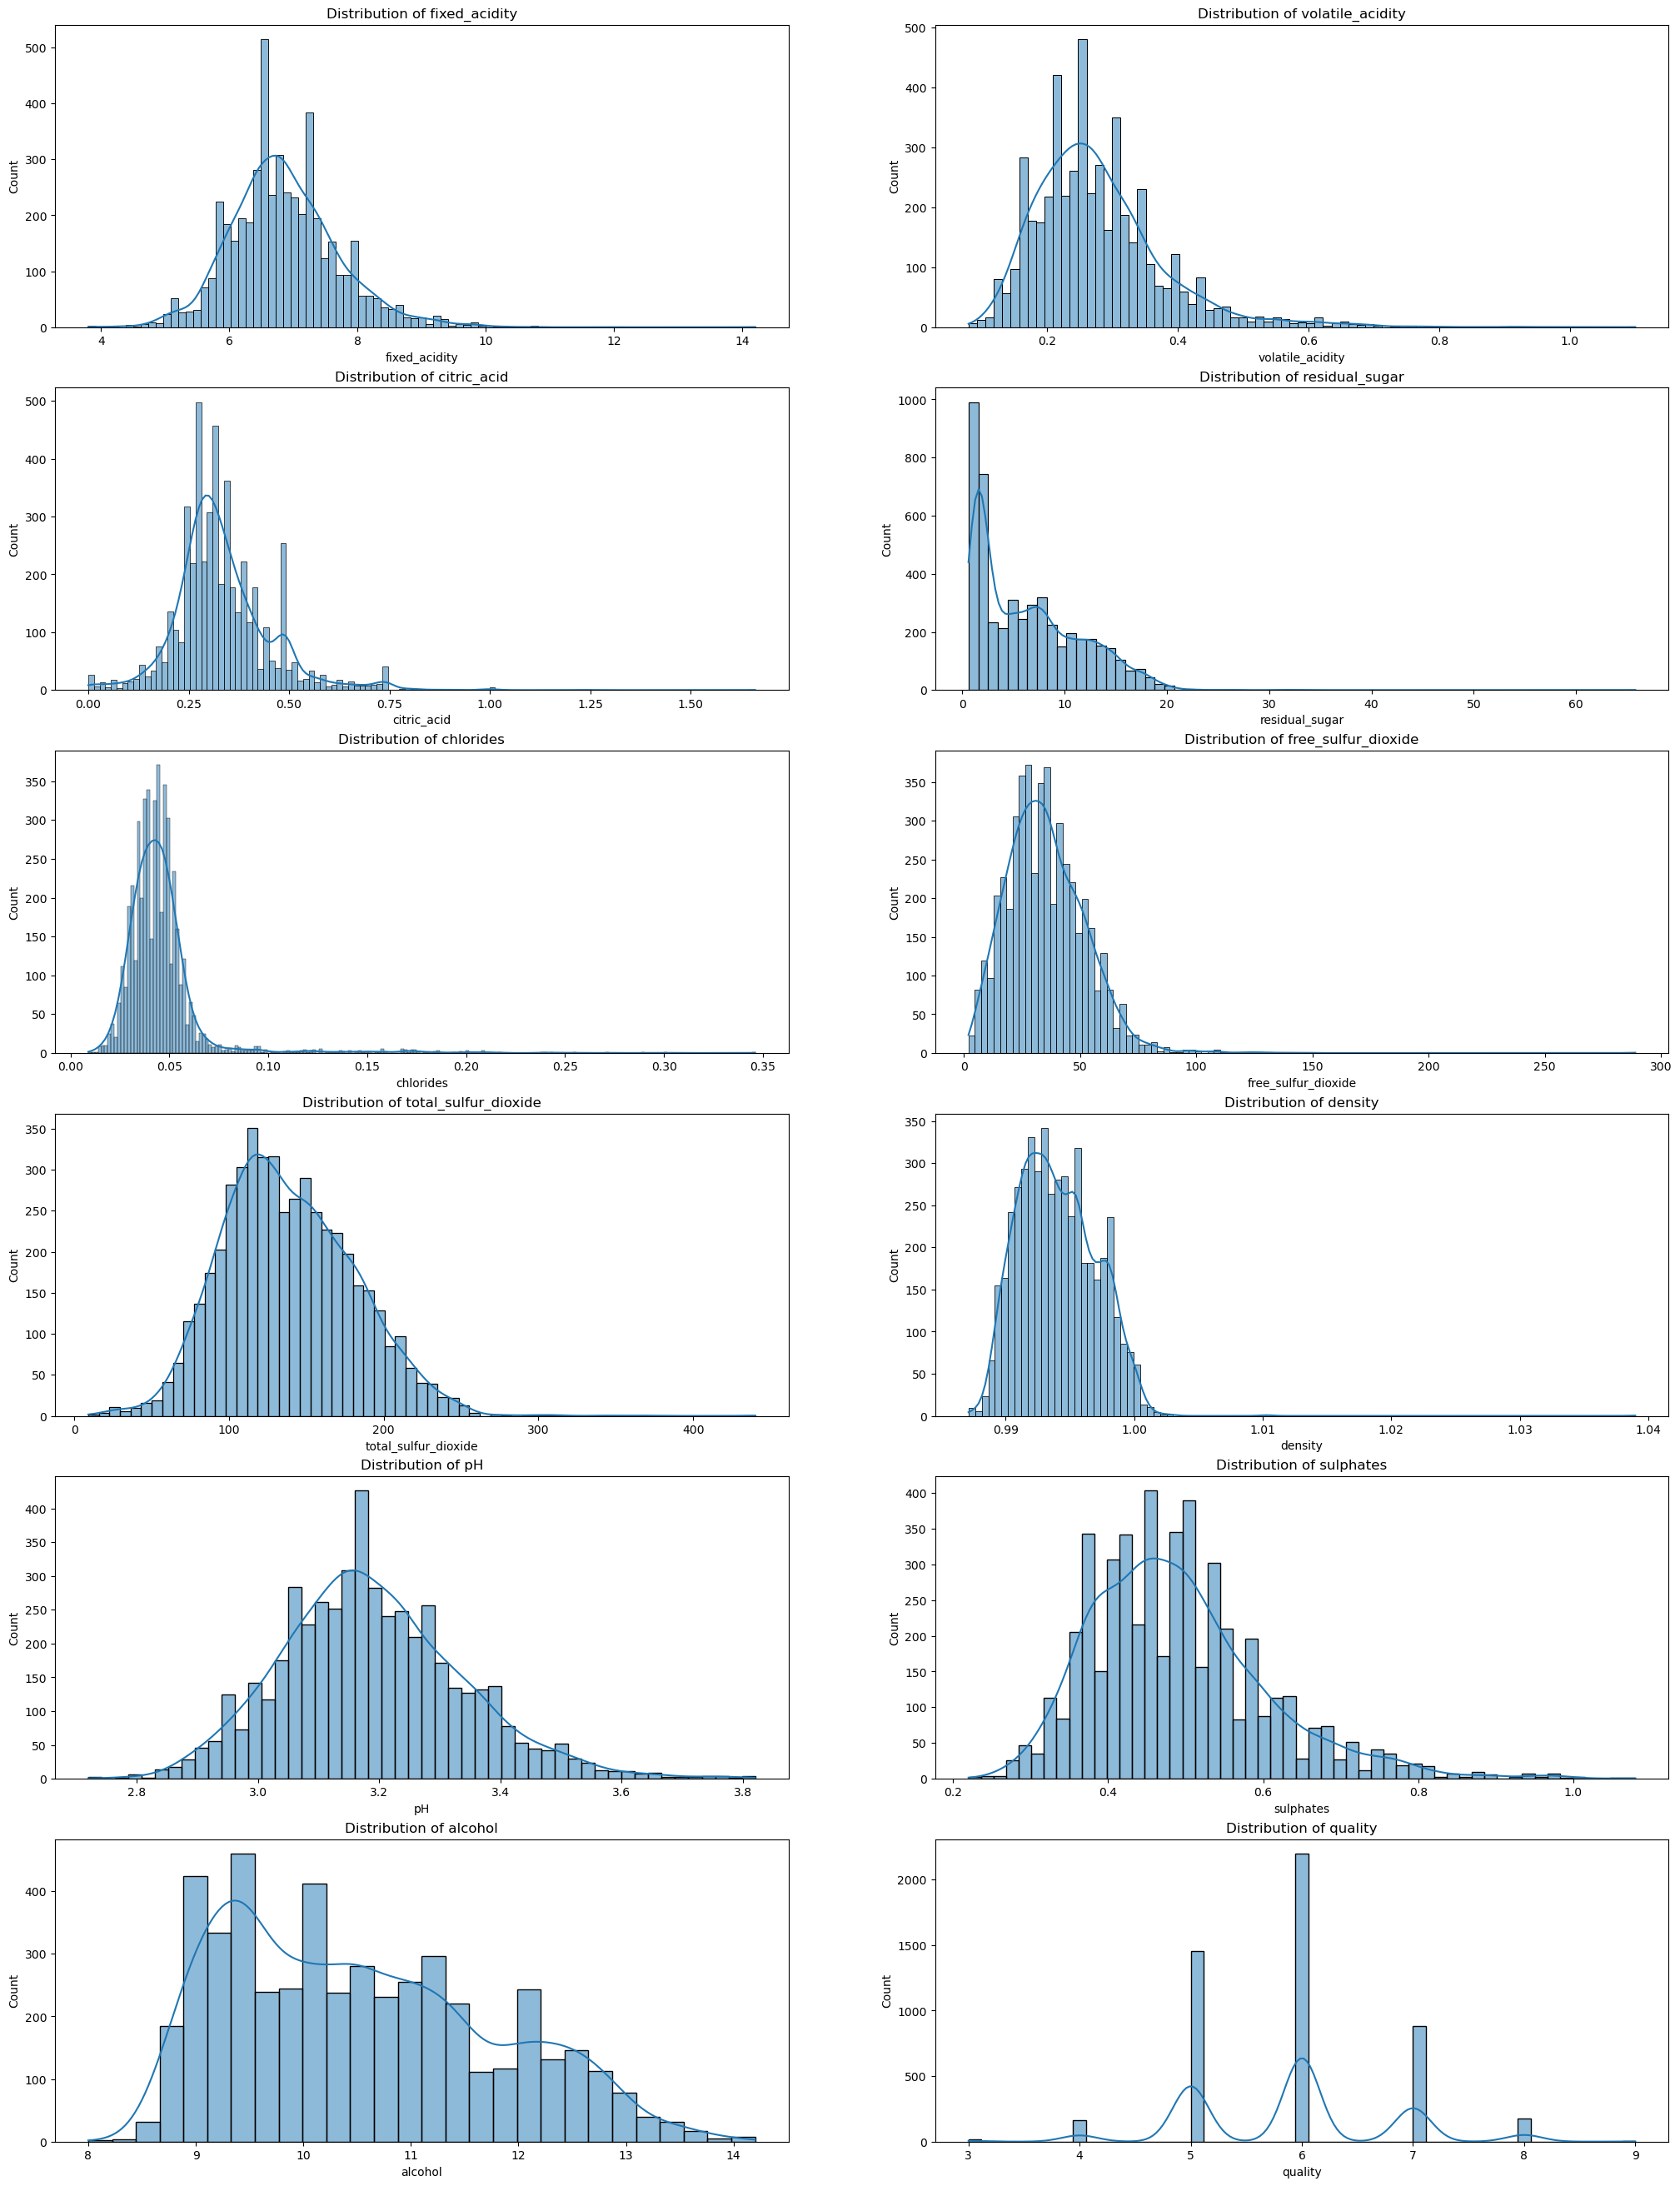

In [54]:
#Defining List of features to plot Histogram Plots
List_Features = ['fixed_acidity','volatile_acidity','citric_acid', 'residual_sugar', 'chlorides',
                 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

#Creating figure with 12 sublopts: Each row in figure will have two plots
fig, ax =plt.subplots(6,2,figsize=(25,33))
ax = np.ravel(ax)

#Plotting Histogram for each feature defined in List_Features & 
#defining title and x-label of each subplot
for i in range(len(List_Features)):
    sns.histplot(White_Wine[List_Features[i]], kde=True,  ax=ax[i])
    ax[i].set(title = 'Distribution of {}'.format(List_Features[i]), xlabel="{}".format(List_Features[i]))

In [55]:
#In addition using describe library from scipy to obtain numpy array of maximum, minimum, mean, variance, skewness and kurtosis values
Desc_Stats = describe(White_Wine, axis=0)

#Splitting numpy array into separate columns
d_stats = {'Minimum Values': Desc_Stats[1][0], '1st Quartile': White_Wine.quantile(q=0.25, axis=0), 'Median': White_Wine.quantile(q=0.5, axis=0),
           '3rd Quartile': White_Wine.quantile(q=0.75, axis=0),'Maximum Values': Desc_Stats[1][1],'Mean': Desc_Stats[2], 'Variance': Desc_Stats[3], 'std':White_Wine.std(),'Skewness': Desc_Stats[4], 'Kurtosis': Desc_Stats[5]}
#Creating Pandas DataFrame
Desc_Stats_DF = pd.DataFrame(data=d_stats)
#Calling DataFrame
Desc_Stats_DF

Minimum Values  1st Quartile     Median  3rd Quartile  \
fixed_acidity                3.80000      6.300000    6.80000        7.3000   
volatile_acidity             0.08000      0.210000    0.26000        0.3200   
citric_acid                  0.00000      0.270000    0.32000        0.3900   
residual_sugar               0.60000      1.700000    5.20000        9.9000   
chlorides                    0.00900      0.036000    0.04300        0.0500   
free_sulfur_dioxide          2.00000     23.000000   34.00000       46.0000   
total_sulfur_dioxide         9.00000    108.000000  134.00000      167.0000   
density                      0.98711      0.991723    0.99374        0.9961   
pH                           2.72000      3.090000    3.18000        3.2800   
sulphates                    0.22000      0.410000    0.47000        0.5500   
alcohol                      8.00000      9.500000   10.40000       11.4000   
quality                      3.00000      5.000000    6.00000        6.0000   

                      Maximum Values        Mean     Variance        std  \
fixed_acidity               14.20000    6.854788     0.712114   0.843868   
volatile_acidity             1.10000    0.278241     0.010160   0.100795   
citric_acid                  1.66000    0.334192     0.014646   0.121020   
residual_sugar              65.80000    6.391415    25.725770   5.072058   
chlorides                    0.34600    0.045772     0.000477   0.021848   
free_sulfur_dioxide        289.00000   35.308085   289.242720  17.007137   
total_sulfur_dioxide       440.00000  138.360657  1806.085491  42.498065   
density                      1.03898    0.994027     0.000009   0.002991   
pH                           3.82000    3.188267     0.022801   0.151001   
sulphates                    1.08000    0.489847     0.013025   0.114126   
alcohol                     14.20000   10.514267     1.514427   1.230621   
quality                      9.00000    5.877909     0.784356   0.885639   

                      Skewness   Kurtosis  
fixed_acidity         0.647553   2.168737  
volatile_acidity      1.576497   5.085205  
citric_acid           1.281528   6.167374  
residual_sugar        1.076764   3.465054  
chlorides             5.021792  37.525039  
free_sulfur_dioxide   1.406314  11.453416  
total_sulfur_dioxide  0.390590   0.570045  
density               0.977474   9.782587  
pH                    0.457642   0.529009  
sulphates             0.976894   1.588081  
alcohol               0.487193  -0.698937  
quality               0.155749   0.215080

Let us briefly describe the distribution of each feature:

1. fixed_acidity
    1. Comparing mean value $6.8548$ to the distribution of fixed_acidity it can be seen that data is slightly shifted to the left of the mean (Right-Skewed distribution). This concurs with the skewness value of $0.6476$.
    2. Distribution of fixed_acidity has a sharper peak with heavier tails, when compared to a normal distribution. This is verified by a positive kurtosis value of $2.1687$.
    
2. volatile_acidity
    1. Similar to fixed_acidity, the distribution of volatile_acidity is Right-Skewed. This can be inferred by comparing the position of the mean value $0.2782$ to the peak of the distribution. This is confirmed by a skewness value of $1.5765$.
    2. Compared to fixed_acidity, the distribution of volatile_acidity has a sharper peak which is confirmed by a higher kurtosis value $5.0852 > 2.1687$
    
3. citric_acid
    1. The distribtion of citric_acid is relatively similar to that of volatile_acidity and fixed_acidity. Comparing the position of the mean values $0.3342$ to the peak of the distribution it can be seen that the data is slightly shifted to the left of the mean. A skewness value of $1.2815$ helps strengthen our argument.
    2. The distribution of citric_acid has an even sharper peak when compared to volatile_acidity which is visible both when comparing distribution plots and kurtosis values $6.1674 > 5.0852$
    
4. residual_sugar
    1. Comparing mean value of $6.3914$ to the distibution of residual_sugar it can be seen that data is shifted to the left of the mean implying a right-skewed distribution. A Skewness value of $1.0768$ confirms our observation.
    2. A significant portion of residual_sugar values are concentrated at lower values. A Kurtosis value of $3.4651$ confirms the presence of heavier tails.
    
5. chlorides
    1. At first glance the distribution of chlorides is clustered around the mean value of $0.0457$. 
    2. The Skewness value of $5.0218$ indicates that the distribution is right-skewed. This is however fairly difficult to tell from the histogram due to the numerically low readings for this feature.
    3. As expected, the Kurtosis value of $37.5250$ is significantly higher than that obtained for any other feature. This indicates a sharper peak and heavier tails when compared to a normal distribution.
    
6. free_sulfur_dioxide
    1. The mean value of free_sulfur_dioxide is $35.3081$. Taking a look at the distribution of this variable, it is clear that the data is shifted to the left of the mean implying a right-skewed distribution. A Skewness value of $1.4063$ confirms our observation.
    2. A Kurtosis value of $11.4534$ indicates that the distribution of free_sulfur_dioxide has a sharper peak and heavier tails when compared to a normal distribution. Taking a look at the histogram plot it is clear that the distribution peak is higher than that generally observed in a normal distribution.
    
7. total_sulfur_dioxide
    1. At first glance the distribution of total_sulfur_dioxide is clustered around a value of $120$ which is less than the mean value of $138.3607$. This is confirmed by a skewness value of $0.3906$ which indicates a right-skewed distribution (albeit value is relatively low). 
    2. In addition, the distribution of total_sulfur_dioxide closely resembles that of a normal distribution. Indeed, the Kurtosis value of $0.5700$ indicates that the distribution is almost symetrical. 
    
8. density
    1. The mean value of density is $0.9940$. From Histogram plot it can be seen that data seems to be shifted to the left of the mean. This is confirmed by a skewness value of $0.9774$. 
    2. The distribution of density does not resemble that of a normal distribution, indeed kurtosis value is $9.7826$.
    
9. pH
    1. The mean $3.1883$ is approximately equivalent to data mid-point as shown by the Histogram plot of pH. This is confirmed by a relatively low skewness value of $0.4576$.
    2. Distribution of pH is relatively similar to that of a normal distribtuion which can be seen both by the Histogram plot and the kurtosis value of $0.5290$.
    
10. sulphates
    1. The mean value of sulphates is $0.4898$. The histogram plot indicates that the data is shifted to the left of this mean. This is confirmed by a skewnees value of $0.9769$ which indicates that the distribution is right skewed.
    2. Clearly from histogram plot it can be seen that sulphates distribution resembles the normal distribution less than other features such as pH and total_sulfur_dioxide. Indeed, sulphates has a kurtosis value of $1.5881$ which is marginally higher than the respective kurtosis values of the two other mentioned distributions.
    
11. Alcohol
    1. From the Histogram plot of alcohol it is difficult to tell if data is shifted to the left of the mean equivalent to $10.5143$. However a skewness value of $0.4872$ seems to indicate that this is the case.
    2. A Kurtosis value of $-0.6989$ indicates that the distribution of Alcohol has a flatter peak than when compared to the normal distribution, which seems to be the case from the histogram plot.
    
12. Quality
    1. From the Histogram plot (or Bar plot) obtained above it is clear that the quality target variable is imbalanced. Indeed, majority of wine samples are of middling/above average quality (5,6,7) whilst bad or exceptional wines are a rarity or even non-existant (No wine samples with a quality value of 1,2 or 10 - These values are not even shown in distribution).

The significant gap between the 3rd quartile and the maximum value, witnessed in majority of variables, may indicate the presence of outliers. To investgate further we shall plot one boxplot for each predictive feature. The 'seaborn.boxplot' function [4] will be utilised to plot each boxplot. By default this function highlights any point outside the range of [Q1 - 1.5*IQR, Q3 + 1.5*IQR] as an outlier.

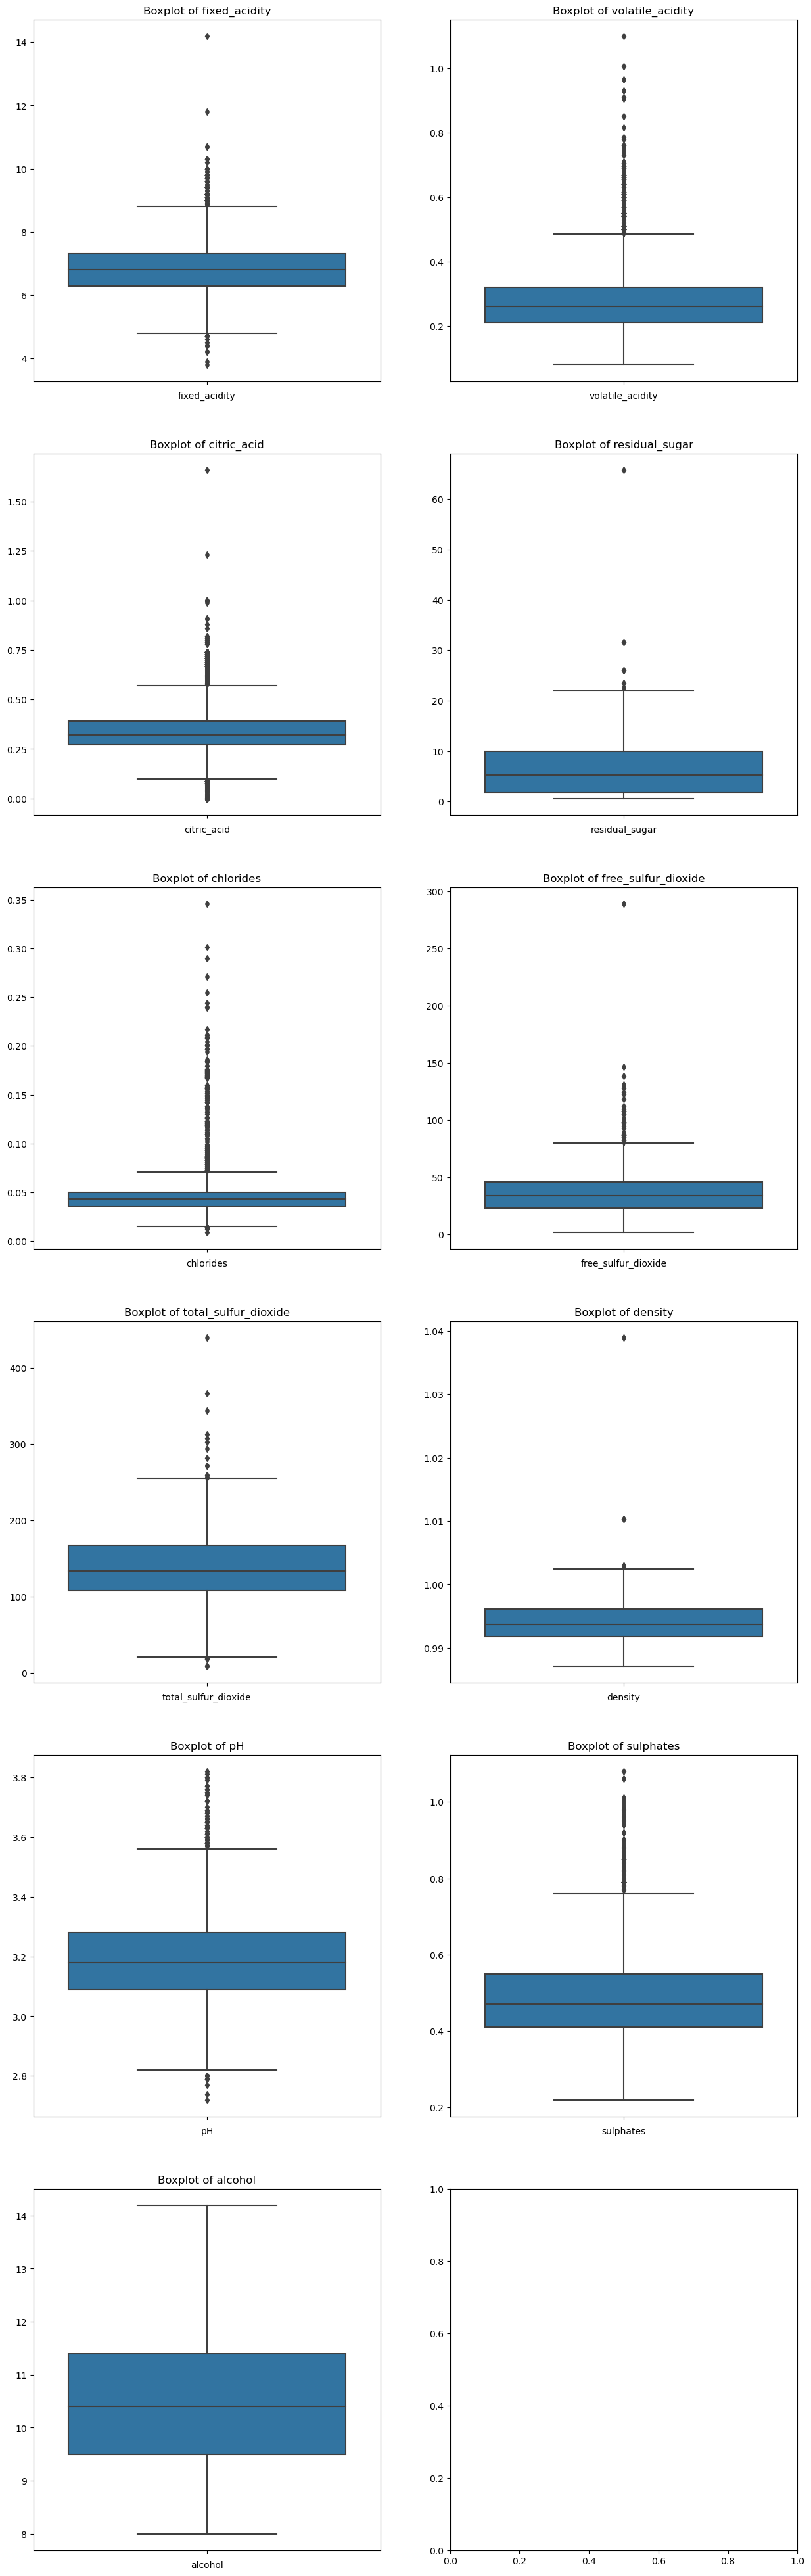

In [56]:
#Creating List of Predictive Features
List_PredFeatures = ['fixed_acidity','volatile_acidity','citric_acid', 'residual_sugar', 'chlorides',
                 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']

#Creating Plot
fig, ax =plt.subplots(6,2,figsize=(15,50))
ax = np.ravel(ax)

#Iterating over List of Predictive Features
for i in range(len(List_PredFeatures)):
    #Plot one boxplot for each predictive feature
    sns.boxplot(data = White_Wine[List_Features[i]], ax=ax[i])
    #Remove xaxis' tick label (was showing only 0 for each feature barplot)
    ax[i].set(xticklabels=[])
    #Set title and x-label for each boxplot
    ax[i].set(title = 'Boxplot of {}'.format(List_Features[i]), xlabel="{}".format(List_Features[i]))

From the above boxplots, it is clear that the only predictive feature to contain no discernible outlier is alcohol. As expected the majority of outliers are of high values compared to the remaining data for the predictive feature in question. The next question we face is how to deal with these outliers.

Let us start of by obtaining the number of entries to be considered as outliers. In our case, an outlier will be any entry which has at least one feature value outside of the range [Q1 - 1.5*IQR, Q3 + 1.5*IQR].

In [57]:
#Defining all predictive features to be checked for outliers
List_PredFeatures = ['fixed_acidity','volatile_acidity','citric_acid', 'residual_sugar', 'chlorides',
                 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']


#Creating empty list to store the entry index for each predictive feature defined above
outlierindices = []

#for loop going over all predictive features listed in List_PredFeatures
for i in List_PredFeatures:
    #Obtaining Quartile 1 of data in predictive feature i
    Q1 = White_Wine[i].quantile(0.25)
    #Obtaining Quartile 3 of data in predictive feature i
    Q3 = White_Wine[i].quantile(0.75)
    #Obtaining Interquartile Range (IQR) for predictive feature i
    IQR = Q3 - Q1
    #Defining Tukey Fences for predictive feature i
    lowerlimit = Q1 - 1.5*IQR
    upperlimit = Q3 + 1.5*IQR
    #Obtaining pandas dataframe of all outliers for feature i 
    outliers = White_Wine[(White_Wine[i] < lowerlimit) | (White_Wine[i] > upperlimit)]
    #appending indices of outliers for feature i to indices obtained for previously analysed features
    outlierindices = outlierindices + outliers.index.tolist()
    #obtaining unique indices (since one entry may have an outlier value for multiple features)
    Outliers = np.unique(outlierindices)
    
#Print number of entries considered as outliers
print('Number of entries with at least one feature value highlighted as an outlier is {}'.format(len(Outliers)))
#Print percentage of entries considered as outliers
print('This is equivalent to {}% of the White Wine Dataset'.format(round((len(Outliers)/len(White_Wine))*100,2)))

Number of entries with at least one feature value highlighted as an outlier is 883
This is equivalent to 18.03% of the White Wine Dataset


Any method used to handle the outliers featured in the barplots above, will affect around 18.03% of the White Wine dataset. However we have no reason to believe that these outliers are not simply a natural variation in the data. Removing/adjusting such a large chunk of our data could remove information about the natural variation in our data. As a result, we will proceed by considering the white wine dataset in its entirety. 

We will now try to understand how both predictive and target features in the white wine dataset relate to each other. 

To understand the relationship between the target feature (quality) and all predictive features we will be once again making use of boxplots. However in each boxplot we will now present the feature variable of interest grouped by the quality variable.

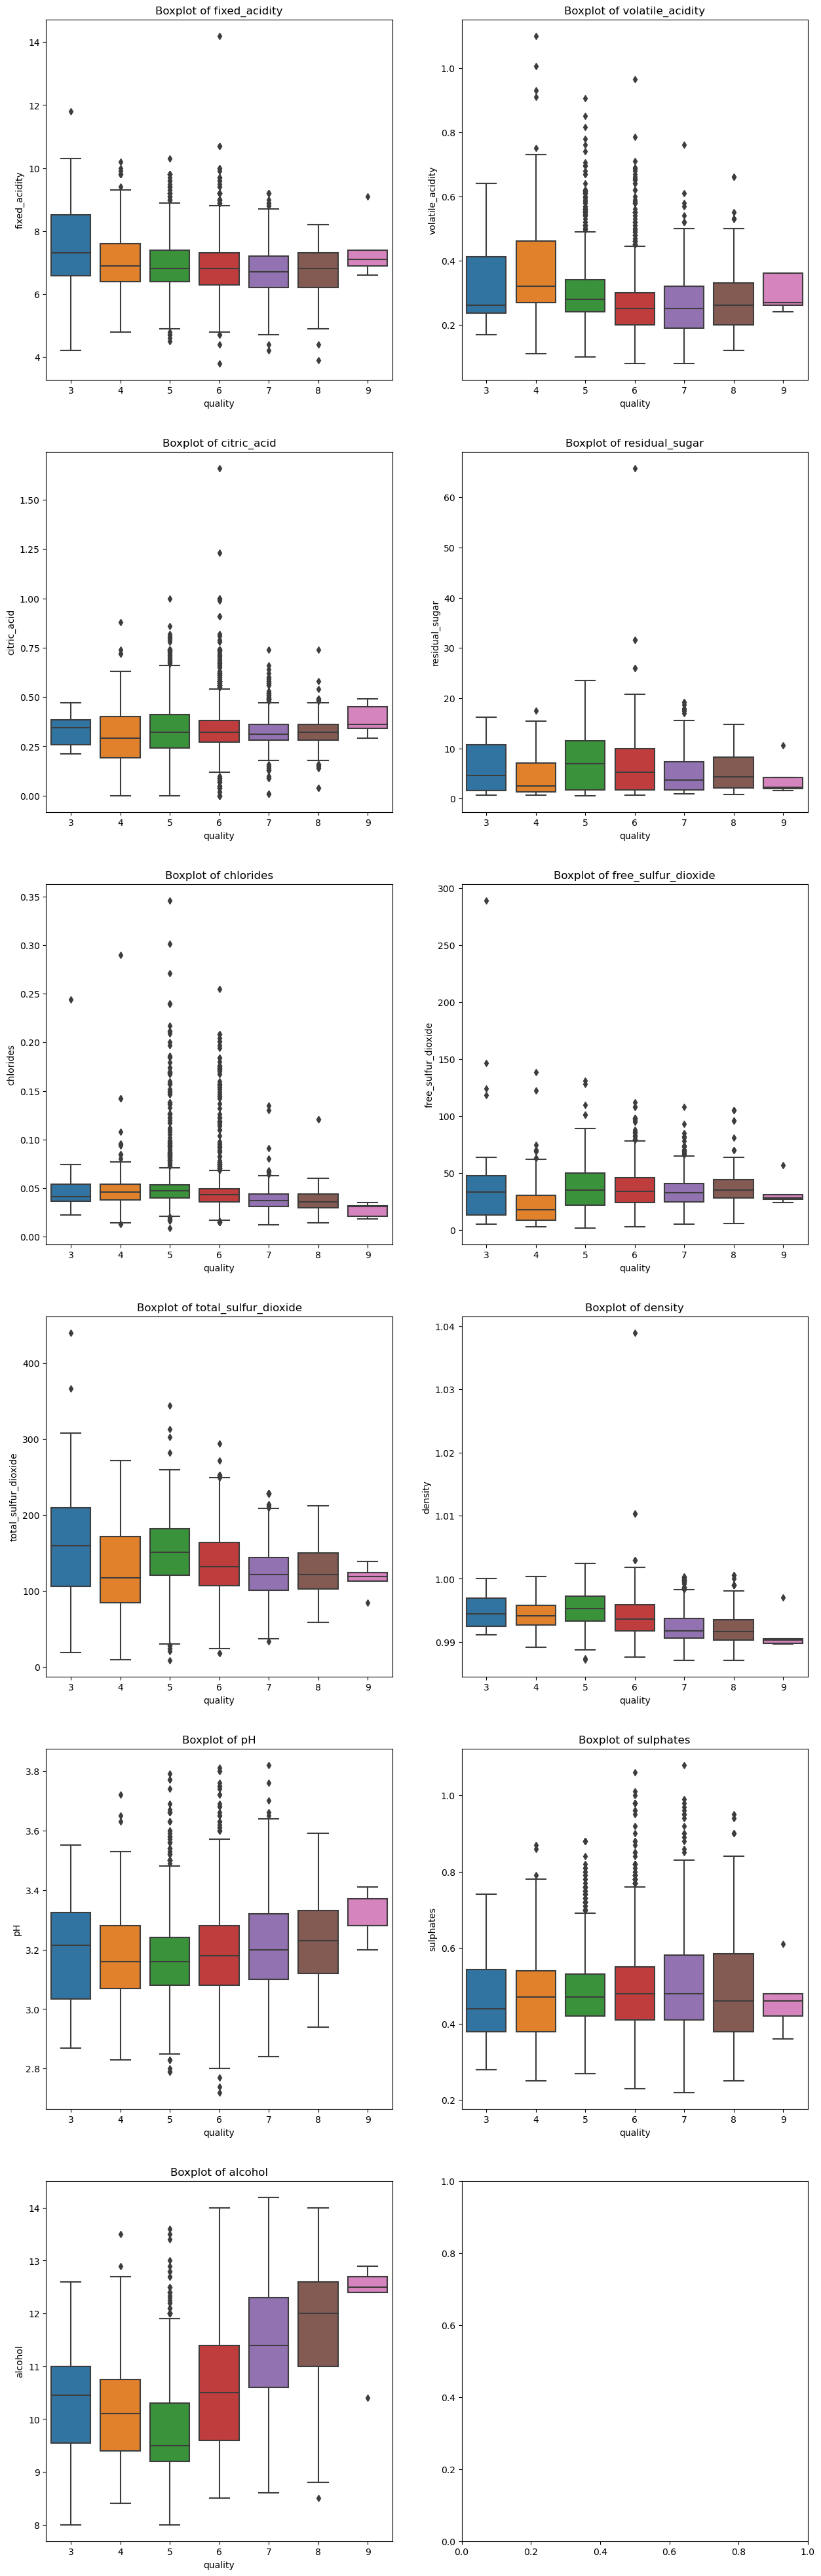

In [58]:
#Creating List of Predictive Features
List_PredFeatures = ['fixed_acidity','volatile_acidity','citric_acid', 'residual_sugar', 'chlorides',
                 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']

#Creating Plot
fig, ax =plt.subplots(6,2,figsize=(15,50))
ax = np.ravel(ax)

#Iterating over List of Predictive Features
for i in range(len(List_PredFeatures)):
    #Plot one boxplot for each predictive feature
    sns.boxplot(x = White_Wine['quality'], y = White_Wine[List_Features[i]], ax=ax[i])
    #Set title and x-label for each boxplot
    ax[i].set(title = 'Boxplot of {}'.format(List_Features[i]), xlabel="{}".format('quality'))

The one clear relationship which can be inferred from the above boxplots is that as the quality of wine increases, the wine alcohol content seems to increase (and vice-versa). 

We will now analyse how the predictive features related to each other. One method of analysing this relationship is by making use of the Pearson's Product-Moment Correlation. However this test of association makes the following assumptions on the data [5]:

1. Variables should be continuous

2. There is a linear relationship between the two variables (Non-Binding)

3. There should be no significant outliers

4. Both variables should be approximately normally distributed

From the analysis carried out on the distributions of each predictive feature, we are aware that the majority are not normally distributed. Alternatively we can make use of the Spearman's Rank-Order correlation which is a non-parametric test and as a result does not require variables to be normally distributed. Indeed the assumptions of this test of association are [5]:

1. Variables should be ordinal or continuous

2. Variables represent paired observations. In our case this assumption is satisfied since we have different feature values for the same wine sample.

3. There is a monotonic relationship between the two variables

As a result we will proceed as follows:
1. We will obtain a correlation heatmap representing the Spearman's Rank-Order Correlation between all features in the White Wine dataset
2. We will obtain all pairwise scatterplots

<AxesSubplot:>

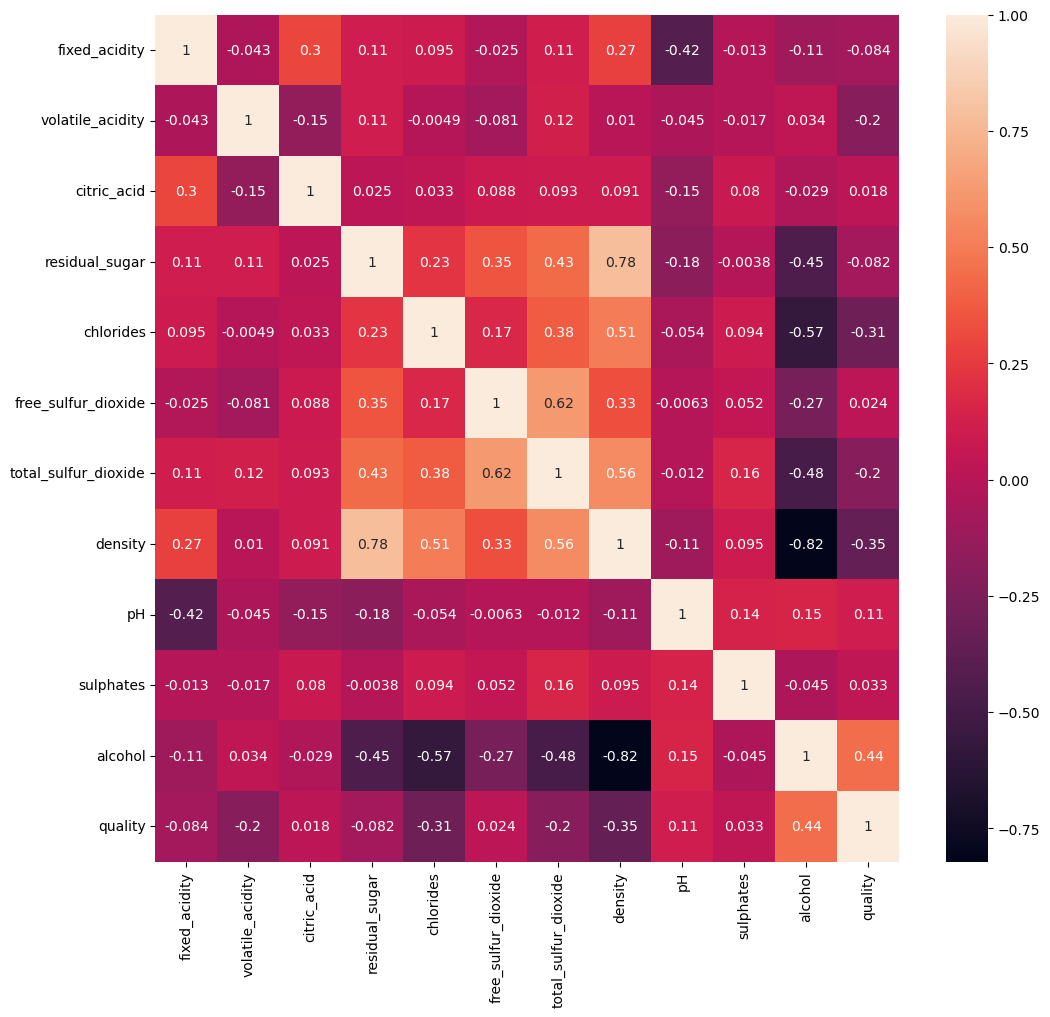

In [59]:
#Correlation to Check how features related to one another

#Compute Correlation 
White_Wine_Correlation = White_Wine.corr(method = 'spearman')
#Create Figure and adjust size
plt.figure(figsize=(12, 11))
#Create Color-encoded matrix
sns.heatmap(White_Wine_Correlation, annot=True)

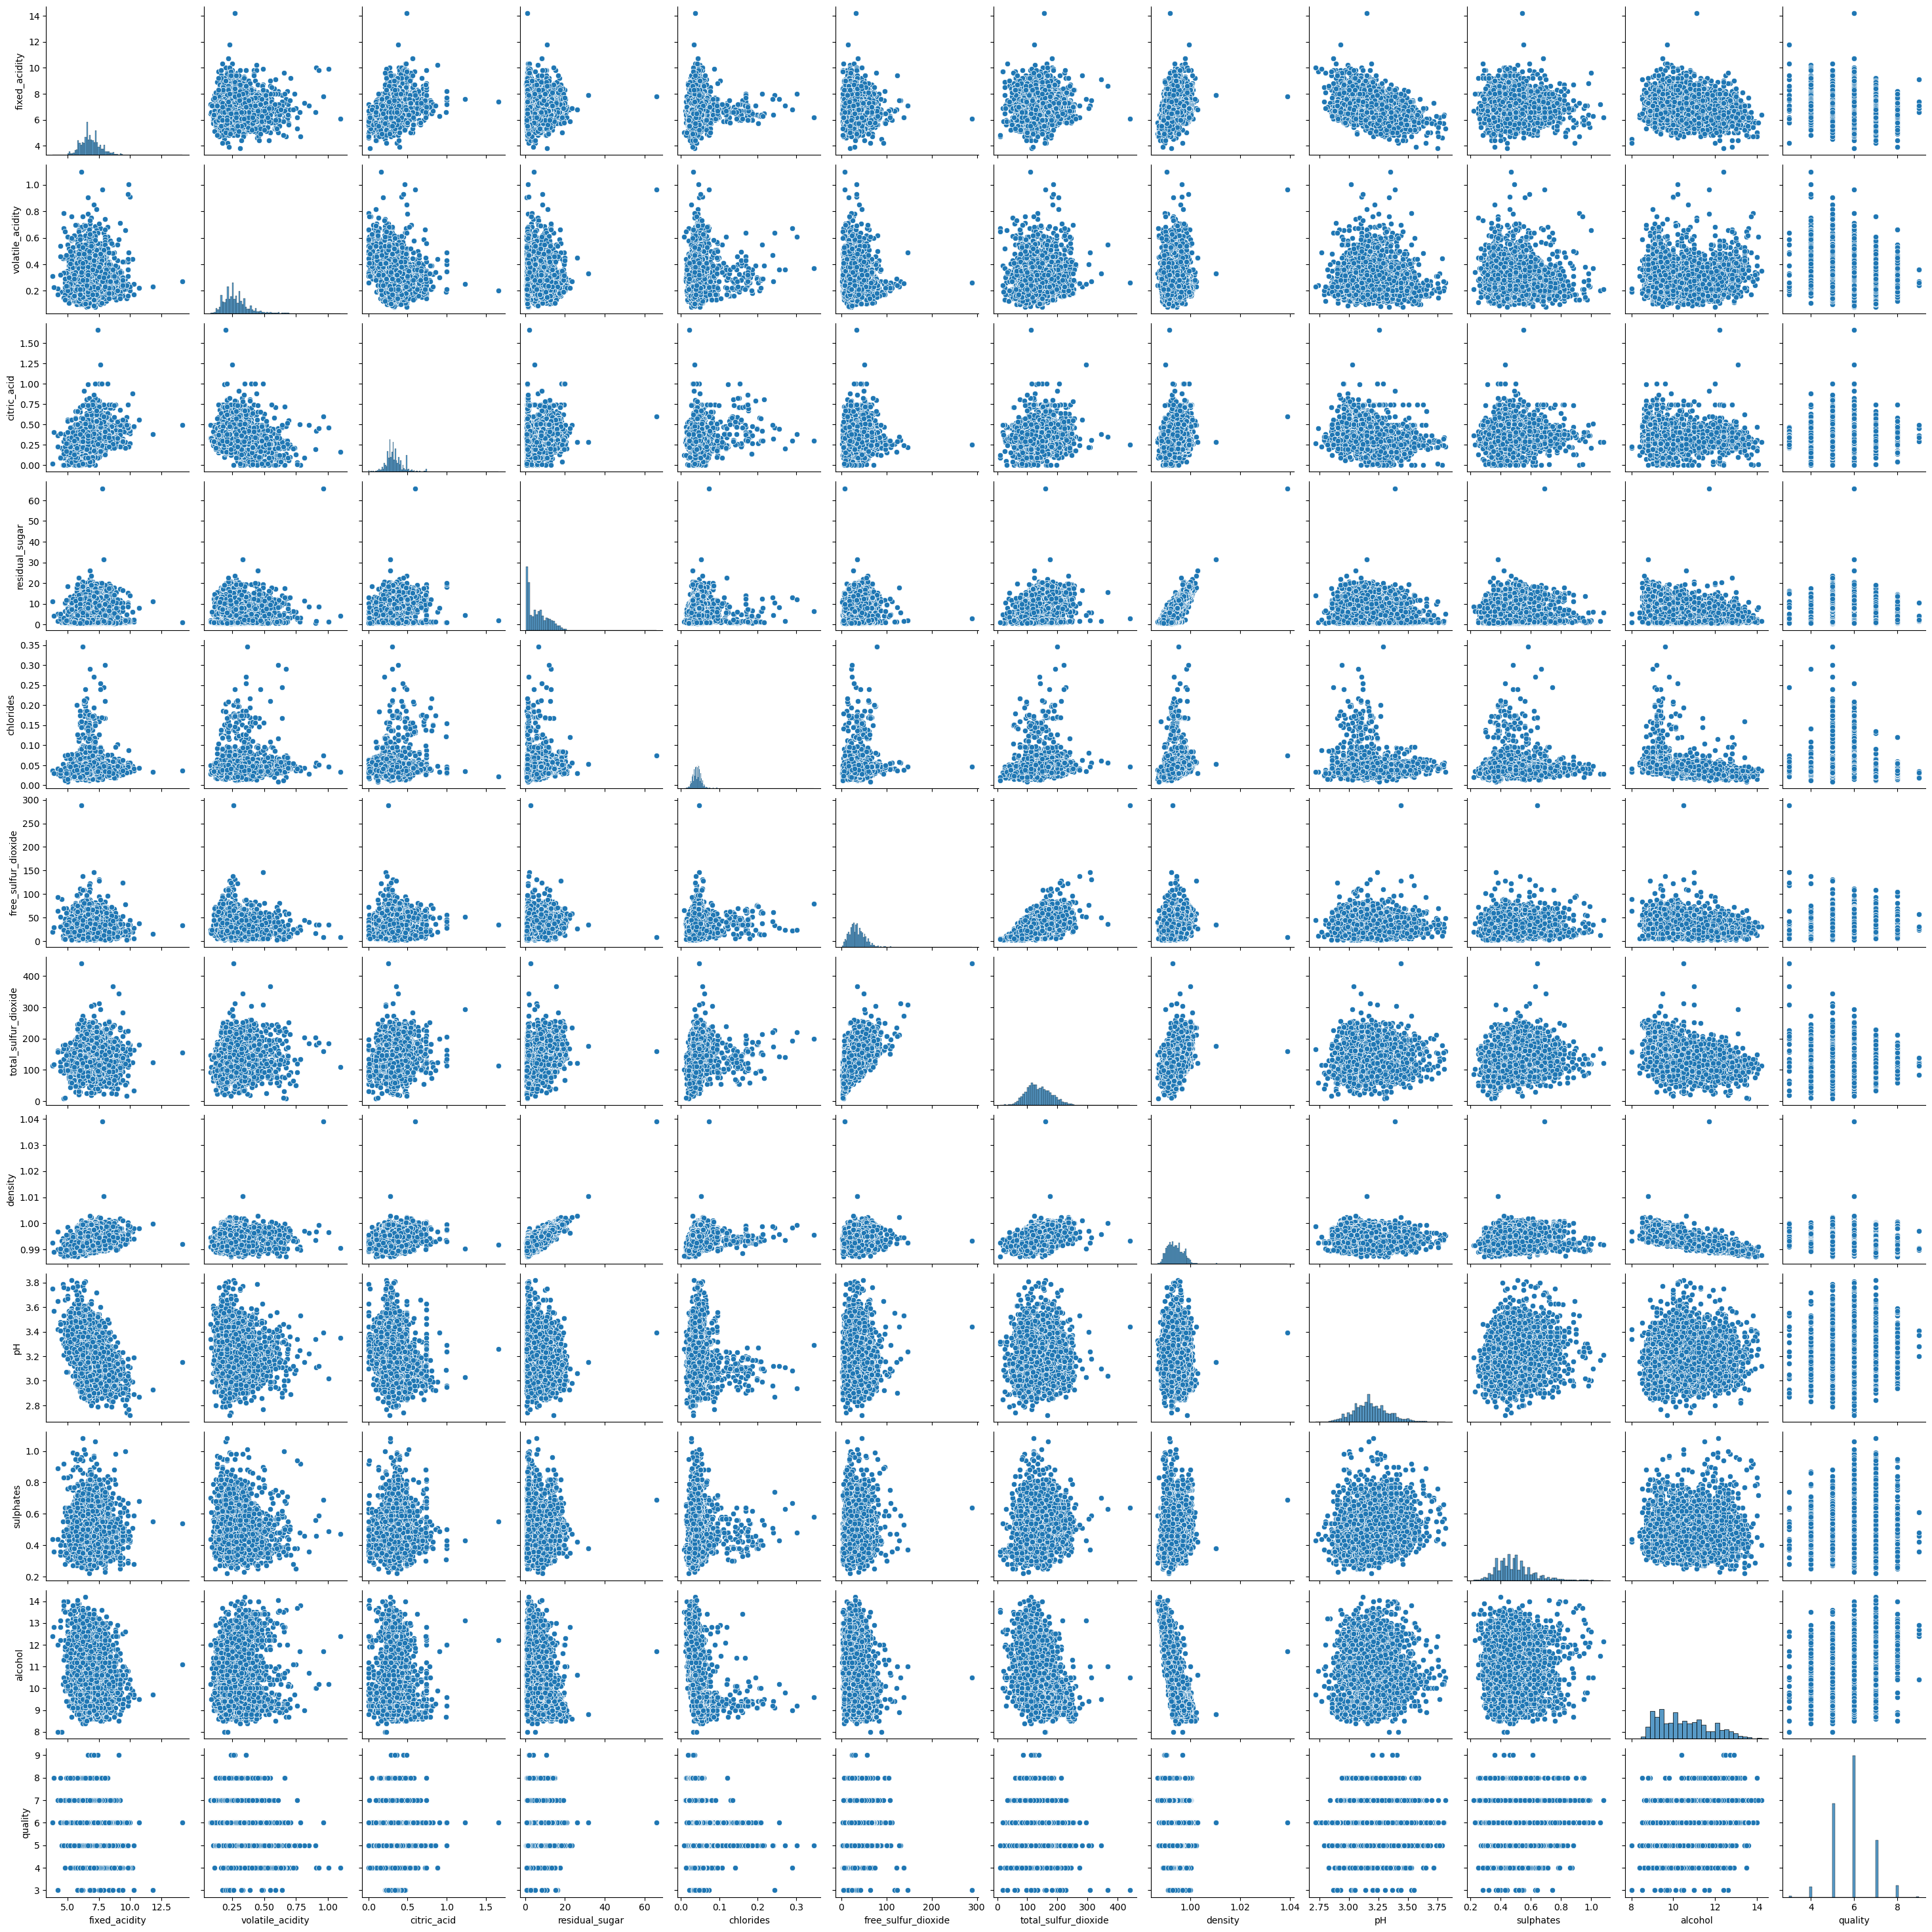

In [60]:
#Obtaining All Pairwise scatter plots using 'seaborn.pairplot'
sns.pairplot(White_Wine)

Clearly the image above is difficult to interpret due to the sheer number of features, so let us take a look at the scatter plots of each pair of variables with an absolute spearman correlation coefficient greater than 0.5 (Indicating multicollinearity) [6].

Residual Sugar and Density (Spearman Correaltion = 0.78)

Text(0, 0.5, 'density')

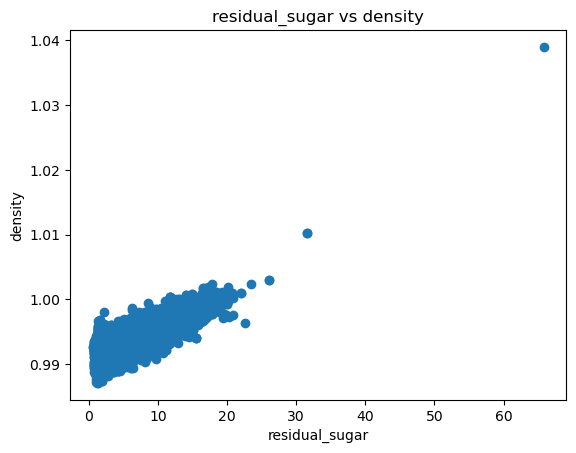

In [61]:
#Scatter Plot for residual_sugar Against density
plt.scatter(White_Wine['residual_sugar'],White_Wine['density'])
plt.title("residual_sugar vs density")
plt.xlabel("residual_sugar")
plt.ylabel("density")

From the above scatter plot it can be seen that as residual_sugar values increase, the density values increase accordingly.

chlorides and density (Spearman Correlation = 0.51)

Text(0, 0.5, 'density')

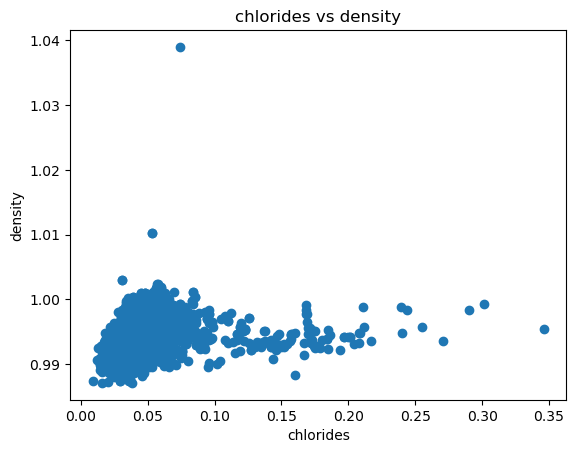

In [62]:
#Scatter Plot for chlorides Against density
plt.scatter(White_Wine['chlorides'],White_Wine['density'])
plt.title("chlorides vs density")
plt.xlabel("chlorides")
plt.ylabel("density")

From the above scatter plot it can be seen that for lower values of chloride, as chloride values increase the density values increase accordingly. However, the relatively few high values of chloride do not seem to exhibt this relationship. Clearly the strength of association between these two variables is less than that exhibted by residual_sugar and density.

chlorides and alcohol (Spearman Correlation = -0.57)

Text(0, 0.5, 'alcohol')

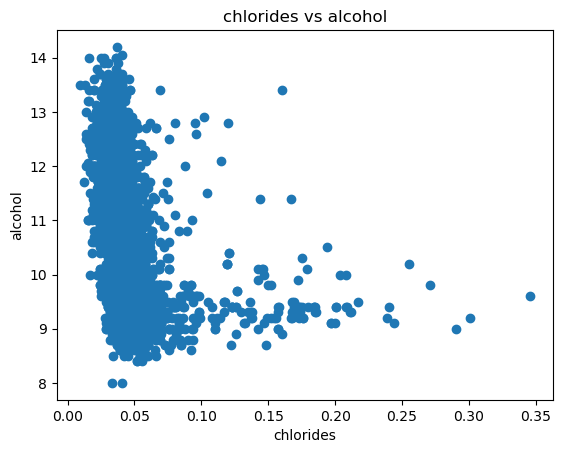

In [63]:
#Scatter Plot for chlorides Against alcohol
plt.scatter(White_Wine['chlorides'],White_Wine['alcohol'])
plt.title("chlorides vs alcohol")
plt.xlabel("chlorides")
plt.ylabel("alcohol")

From the above scatter plot it can be seen that as chloride values increase, the alcohol content in wine decreases accordingly. Indeed, a slight increase in chloride value seems to decrease alcohol content dramatically.

free_sulfur_dioxide and total_sulfur_dioxide (Spearman Correlation = 0.62)

Text(0, 0.5, 'total_sulfur_dioxide')

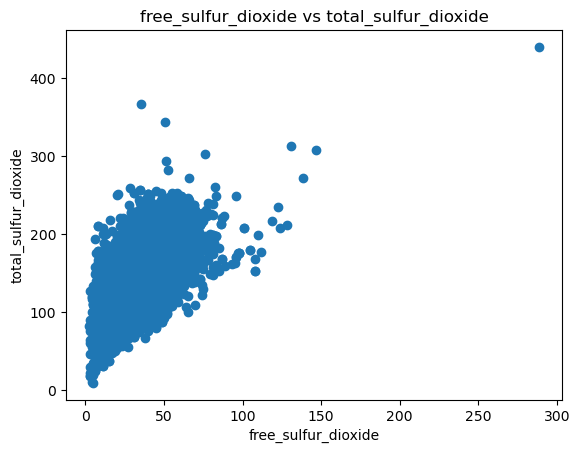

In [64]:
#Scatter Plot for free_sulfur_dioxide Against total_sulfur_dioxide
plt.scatter(White_Wine['free_sulfur_dioxide'],White_Wine['total_sulfur_dioxide'])
plt.title("free_sulfur_dioxide vs total_sulfur_dioxide")
plt.xlabel("free_sulfur_dioxide")
plt.ylabel("total_sulfur_dioxide")

From the above scatter plot it can be seen that as free_sulfur_dioxide values increase, the total_sulfur_dioxide values increase accordingly. 

total_sulfur_dioxide and density (Spearman Correlation = 0.56)

Text(0, 0.5, 'density')

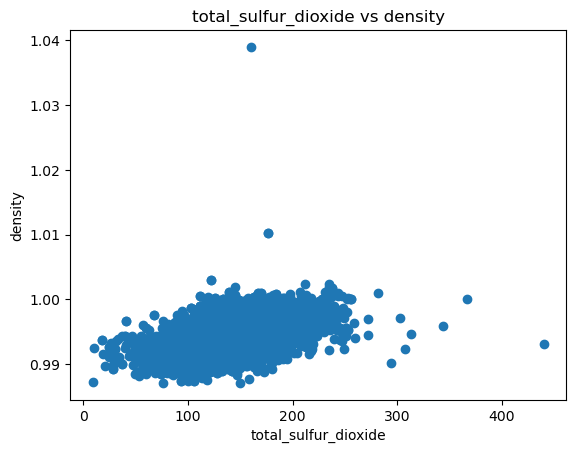

In [65]:
#Scatter Plot for total_sulfur_dioxide Against density
plt.scatter(White_Wine['total_sulfur_dioxide'],White_Wine['density'])
plt.title("total_sulfur_dioxide vs density")
plt.xlabel("total_sulfur_dioxide")
plt.ylabel("density")

As total_sulfur_dioxide values increase, density values seem to increase slightly. 

density and alcohol (Spearman Correlation = -0.82)

Text(0, 0.5, 'alcohol')

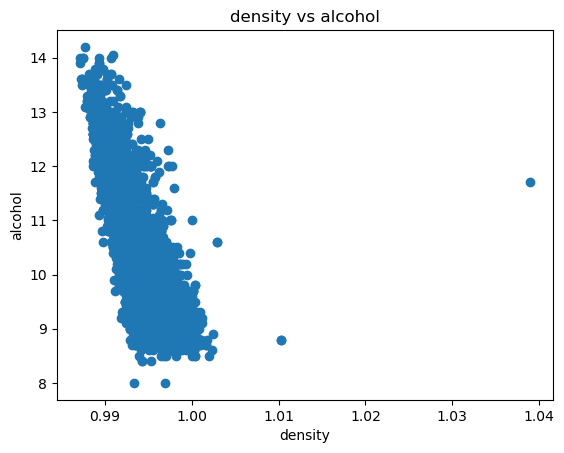

In [66]:
#Scatter Plot for density Against alcohol
plt.scatter(White_Wine['density'],White_Wine['alcohol'])
plt.title("density vs alcohol")
plt.xlabel("density")
plt.ylabel("alcohol")

The above scatterplot highlights the relationship between alochol and density clearly. As density values increase, the alcohol content in wine decreases accordingly.

<b> NB: While the quality target feature does not have an absolute Spearman correlation value beyond 0.5, as expected from previously obtained boxplots the highest spearman correlation for quality was obtained when paired with the alcohol variable (Spearman Correlation = 0.44)

## Task 2 - Dimensionality reduction and PCA (30 marks)

<b> Perform data scaling on the predictive features (not the target feature). Comment on the method you choose for scaling.

In their book Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn and Tensorflow, Raschka and Mirjalili [7] discuss suitable scaling techniques whilst building a machine learning pipeline. 

In comparison to min-max scaling, they state that standardization can be a more effective technique when making use of optimzation algorithms such as Support Vector Machine (SVM) algorithms. The reasoning behind this conclusion is that since standardization centers each feature column at mean of 0 with a standard deviation of 1, this transformation makes it easier for the optimization algorithm to calculate the final set of weights.

As discussed in Task 1, our data also contains a number of outliers for each feature. Raschka and Mirjalili [7] state that standardization preserves information about outliers. Recall, that our reasoning behind not removing outliers was since we believe that these outliers are a natural variation in our data

Standardization for one feature is calculated using the following equation [7]:
$$x' = \frac{x-\bar{x}}{s}$$.

Where:

1. $x'$ - scaled feature values vector

2. $x$ - original feature values vector

3. $\bar{x}$ - mean of feature column

4. $s$ - standard deviation of feature column


We shall now proceed by applying standardization on the predictive features of the white wine dataset. This will be done by making use of the 'sklearn.preprocessing.StandardScaler' function [8].

In [67]:
#Start of by splitting dataset into predictive features and target features
White_Wine_Features = White_Wine[['fixed_acidity','volatile_acidity','citric_acid', 'residual_sugar', 'chlorides',
                 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
White_Wine_Target = White_Wine['quality']

In [68]:
#Carrying Standardization on White_Wine_ToScale

Stand_Scale = StandardScaler()
#Fitting Standardization on White_Wine_ToScale
White_Wine_Scaled = Stand_Scale.fit_transform(White_Wine_Features)
#Turn Array into Pandas DataFrAME
White_Wine_Scaled = pd.DataFrame(White_Wine_Scaled,index=White_Wine_Features.index,
                                   columns=White_Wine_Features.columns)

In [69]:
White_Wine_Scaled

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0          0.172097         -0.081770     0.213280        2.821349  -0.035355   
1         -0.657501          0.215896     0.048001       -0.944765   0.147747   
2          1.475751          0.017452     0.543838        0.100282   0.193523   
3          0.409125         -0.478657    -0.117278        0.415768   0.559727   
4          0.409125         -0.478657    -0.117278        0.415768   0.559727   
...             ...               ...          ...             ...        ...   
4893      -0.776015         -0.677101    -0.365197       -0.944765  -0.310008   
4894      -0.301959          0.414339     0.213280        0.317179   0.056196   
4895      -0.420473         -0.379435    -1.191592       -1.023637  -0.218457   
4896      -1.605613          0.116674    -0.282557       -1.043355  -1.088192   
4897      -1.013043         -0.677101     0.378559       -1.102508  -1.179743   

      free_sulfur_dioxide  total_sulfur_dioxide   density        pH  \
0                0.569932              0.744565  2.331512 -1.246921   
1               -1.253019             -0.149685 -0.009154  0.740029   
2               -0.312141             -0.973336  0.358665  0.475102   
3                0.687541              1.121091  0.525855  0.011480   
4                0.687541              1.121091  0.525855  0.011480   
...                   ...                   ...       ...       ...   
4893            -0.664970             -1.091000 -0.965483  0.541334   
4894             1.275590              0.697499  0.291789 -0.253446   
4895            -0.312141             -0.643875 -0.497350 -1.313153   
4896            -0.900190             -0.667408 -1.784717  1.004955   
4897            -0.782580             -0.949803 -1.543962  0.475102   

      sulphates   alcohol  
0     -0.349184 -1.393152  
1      0.001342 -0.824276  
2     -0.436816 -0.336667  
3     -0.787342 -0.499203  
4     -0.787342 -0.499203  
...         ...       ...  
4893   0.088973  0.557282  
4894  -0.261553 -0.743008  
4895  -0.261553 -0.905544  
4896  -0.962605  1.857572  
4897  -1.488394  1.044891  

[4898 rows x 11 columns]

<b> Apply PCA for dimensionality reduction. Compare the variance of the original features and the variance of the principal components. Use appropriate visualization if it helps

In [70]:
#Initialise a PCA Instance
pca_whitewine = PCA()
#Use fit_transform function to carry out eigen-decompostion and projection of 
#data in the PCA space
principalcomponent_whitewine = pca_whitewine.fit_transform(White_Wine_Scaled)

#Present Principal Component Values in a Dataframe (Each Component is 
#represented as a column labelled from 1 to 11)
principalcomponent_whitewine_df = pd.DataFrame(data = principalcomponent_whitewine,
                                               columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'])
principalcomponent_whitewine_df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     3.676944 -0.545233 -0.930422 -1.135374 -0.292855 -0.891620  0.204664   
1    -0.644588  0.430770 -0.356331  0.999117 -0.714078 -0.483738  0.436998   
2     0.155291 -1.189800 -0.017532  0.270219 -0.367706 -0.500682  0.554319   
3     1.455374  0.099680 -0.001956 -0.423022 -0.469981  0.769261 -0.197702   
4     1.455374  0.099680 -0.001956 -0.423022 -0.469981  0.769261 -0.197702   
...        ...       ...       ...       ...       ...       ...       ...   
4893 -2.094367  0.390789  0.325364  0.088145 -0.755337 -0.283772 -0.108921   
4894  1.295014  0.490753 -0.066307 -0.381234  0.267347  0.839791  0.033669   
4895 -0.779731 -0.408480 -0.664677 -0.134766 -0.808279  0.133791 -1.616482   
4896 -3.407302  0.915744 -0.268297 -0.762126 -0.080705  0.497135  0.978533   
4897 -2.823212 -0.130939  0.213890 -1.113138 -0.880635  0.550309  0.965723   

           PC8       PC9      PC10      PC11  
0    -1.025184  0.150609 -0.075905  0.042190  
1     0.584930 -1.063550 -0.253919  0.127904  
2     0.974902  0.549654  0.855570 -0.184295  
3     0.601653  0.293244 -0.403700 -0.045274  
4     0.601653  0.293244 -0.403700 -0.045274  
...        ...       ...       ...       ...  
4893 -0.148646 -0.117824  0.081925  0.023064  
4894 -0.157898 -0.474523  0.436497 -0.097257  
4895 -0.278473 -1.239170  0.255397  0.105018  
4896 -0.165963 -0.101411 -0.649501  0.018132  
4897  0.047230 -0.538810 -0.297893 -0.042435  

[4898 rows x 11 columns]

Let us now compare the variance of the original features and the variance of the principal components.

To do so we shall plot two table. The first table will consist of two numerical columns named as follows:

   1. Original_Features_Variance - Represents the variance of each feature prior to scaling and applying PCA
   
   2. Scaled_Features_Variance - Represents the variance of each feature following scaling but before applying PCA

The second table will consist of one numerical column named as follows:

   1. PCA_Variance - Represents the variance of each principal components

In [71]:
#Defining Pandas Series for variance of Original_Features, Scaled_Features and PCA_Components
Original_Features_Variance = White_Wine_Features.var(axis=0)
Scaled_Features_Variance =White_Wine_Scaled.var(axis=0)
PCA_Variance = principalcomponent_whitewine_df.var(axis=0)

#Creating First Table
Table_1 = pd.concat([Original_Features_Variance, Scaled_Features_Variance], axis = 1, keys= ['Original_Features_Variance','Scaled_Features_Variance'])
Table_2 = pd.DataFrame(PCA_Variance ,columns=['PCA_Variance'])

In [72]:
#Calling Table 1 and adding row rep. total variance of original features and scaled features
Table_1.loc['Sum'] = Table_1[['Original_Features_Variance','Scaled_Features_Variance']].sum()
Table_1

Original_Features_Variance  Scaled_Features_Variance
fixed_acidity                           0.712114                  1.000204
volatile_acidity                        0.010160                  1.000204
citric_acid                             0.014646                  1.000204
residual_sugar                         25.725770                  1.000204
chlorides                               0.000477                  1.000204
free_sulfur_dioxide                   289.242720                  1.000204
total_sulfur_dioxide                 1806.085491                  1.000204
density                                 0.000009                  1.000204
pH                                      0.022801                  1.000204
sulphates                               0.013025                  1.000204
alcohol                                 1.514427                  1.000204
Sum                                  2123.341639                 11.002246

Recall that standardization centers each feature column at a mean 0 and a standard deviation of 1. Hence, as expected all features following scaling have a variance approximately equal to 1. For some features standardization led to a dramatic decrease in variance, while for other features the variance increased substantially. 

At the bottom of the table we have a row representing the sum of variances of both the original features (2123.341639) and the scaled features (11.002246). Since we have carried out PCA on the scaled features we expect that the sum of variance of the principal components will be equivalent to the sum of variances of the scaled features (11.002246) [9].

In [73]:
#Calling Table 2 and adding row rep. total variance of Principal Components
Table_2.loc['Sum'] = Table_2[['PCA_Variance']].sum()
Table_2

PCA_Variance
PC1       3.222912
PC2       1.575562
PC3       1.221921
PC4       1.018730
PC5       0.973533
PC6       0.938933
PC7       0.726746
PC8       0.599481
PC9       0.414228
PC10      0.289546
PC11      0.020653
Sum      11.002246

As expected the sum of variance of principal components is 11.002246 which is equivalent to the sum of variance of the scaled features. In addition, the principal components are ordered according to their variance whereby PC1 captures the highest variance in the data, PC2 captures the second highest variance in the data and so on.

To compare further the correlation between original variables and principal components we can also make use of the factor loading matrix. Essentialy the entries of the factor loading matrix will display the correlation between the original variable and the principal components [10].

<AxesSubplot:>

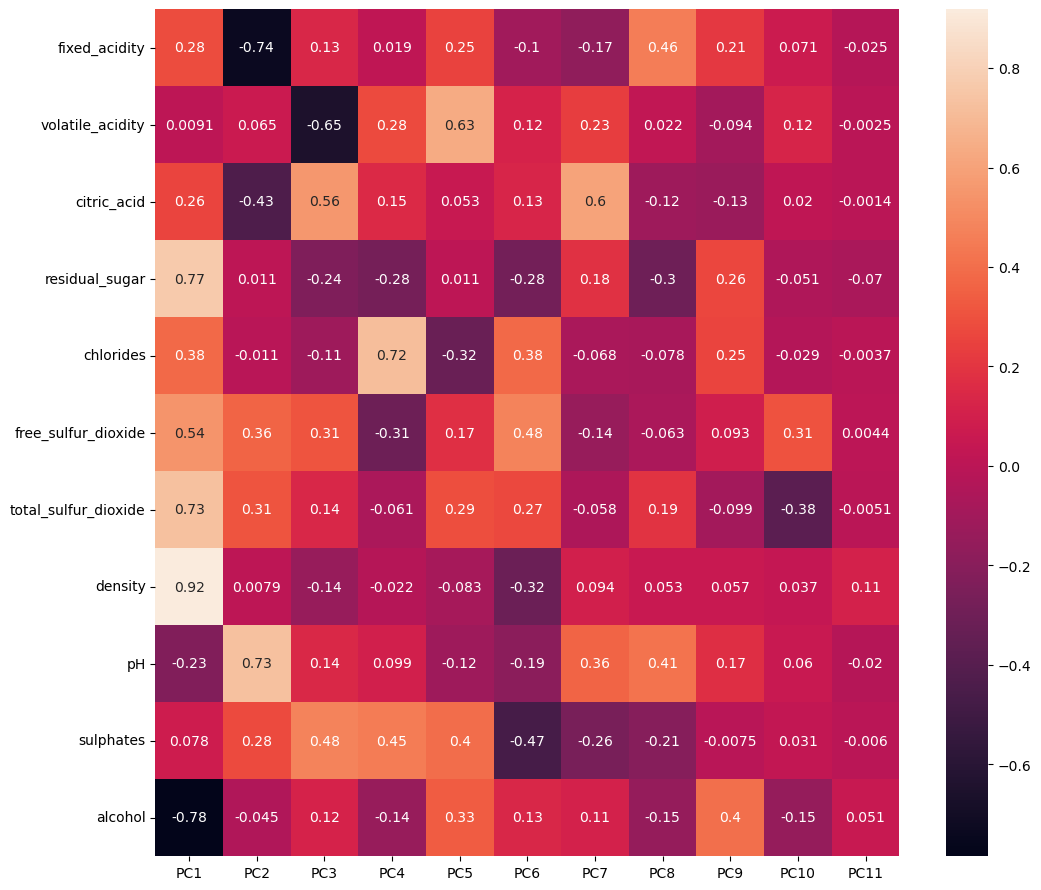

In [74]:
#Obtaining Loadings
Factor_Loadings = pca_whitewine.components_.T * np.sqrt(pca_whitewine.explained_variance_)

#Defining Loading Matrix
Facor_Loadings_DF = pd.DataFrame(Factor_Loadings,
                        columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'],
                       index = ['fixed_acidity','volatile_acidity','citric_acid', 'residual_sugar', 'chlorides',
                 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol'])

#Defining Figure
plt.figure(figsize=(12, 11))
#Calling Loading Matrix
sns.heatmap(loading_matrix,  annot=True)

From the above factor loading matrix, let us consider the first principal component. Taking correlations above $abs(0.5)$ it can be seen that residual sugar, free_sulfur_dioxide, density and alcohol are all heavily correlated with this component. 

In general, it is only the last two components which do not seem to be heavily correlated with any original feature. Thus explaining why these two components represent less explanaible variance in our data.

<b> Determine how many components to keep and how many to discard.
Comment on the choice of number of components, and on any
implications.

To aid us in determining the number of components to keep let, us make use of scree plots. Scree Plots are line plots representing the eigenvalues or variance for each principal component [11]. In addition, a separate plot representing the cumulative proportion of explained variance for each principal component will be illustrated.

Text(0, 0.5, 'cumulative proportion of explained variance')

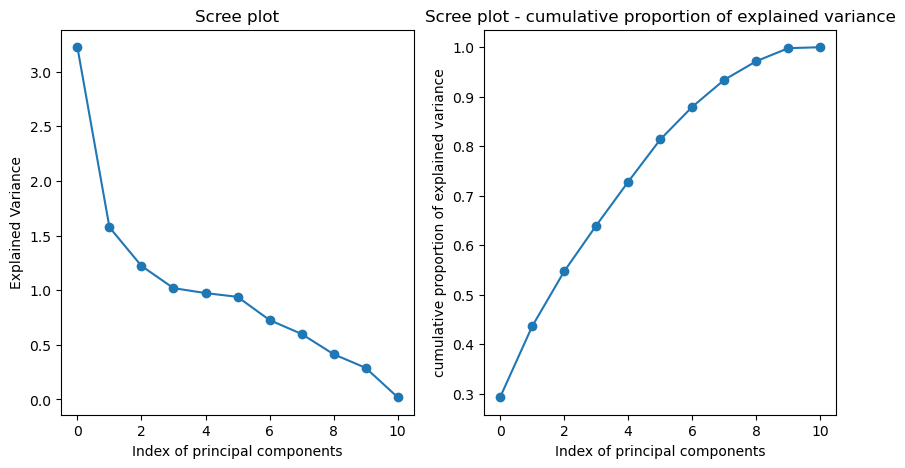

In [75]:
#Creating figure and sub-plots
fig, ax =plt.subplots(1,2,figsize=(10,5))

#Scree Plot representing the eignvalues for each principal component
ax[0].plot(pca_whitewine.explained_variance_,'-o')
#Title
ax[0].set_title("Scree plot")
#x-axis label
ax[0].set_xlabel("Index of principal components")
#y-axis label
ax[0].set_ylabel("Explained Variance")

#Scree Plot representing the cumulative proportion of explained variance
ax[1].plot(np.cumsum(pca_whitewine.explained_variance_ratio_), '-o')
#Title
ax[1].set_title("Scree plot - cumulative proportion of explained variance")
#x-axis label
ax[1].set_xlabel("Index of principal components")
#y-axis label
ax[1].set_ylabel("cumulative proportion of explained variance")

Generally when making use of scree plots to select the number of components we look for an 'elbow' in the curve [11]. Beyond this point, the eigenvalues of each principal component are significantly lower than previous values s.t the addition of any such component would add very little information to our model.  

From our plots it is difficult to locate this 'elbow', thus it is not clear how many components should be selected. As a result, we will select the number of components which explain 95% of the variance in our model. This is done so that the number of PCA components selected is still able to explain a signifcant portion of the variability in our dataset.  

In [76]:
#Initialise a PCA Instance
pca_whitewine_final = PCA(n_components = 0.95)
#Use fit_transform function to carry out eigen-decompostion and projection of 
#data in the PCA space
principalcomponent_whitewine_final = pca_whitewine_final.fit_transform(White_Wine_Scaled)

#Present Principal Component Values in a Dataframe (Each Component is 
#represented as a column labelled from 1 to 11)
principalcomponent_whitewine_dfinal = pd.DataFrame(data = principalcomponent_whitewine_final,
                                               columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
principalcomponent_whitewine_dfinal

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     3.676944 -0.545233 -0.930422 -1.135374 -0.292855 -0.891620  0.204664   
1    -0.644588  0.430770 -0.356331  0.999117 -0.714078 -0.483738  0.436998   
2     0.155291 -1.189800 -0.017532  0.270219 -0.367706 -0.500682  0.554319   
3     1.455374  0.099680 -0.001956 -0.423022 -0.469981  0.769261 -0.197702   
4     1.455374  0.099680 -0.001956 -0.423022 -0.469981  0.769261 -0.197702   
...        ...       ...       ...       ...       ...       ...       ...   
4893 -2.094367  0.390789  0.325364  0.088145 -0.755337 -0.283772 -0.108921   
4894  1.295014  0.490753 -0.066307 -0.381234  0.267347  0.839791  0.033669   
4895 -0.779731 -0.408480 -0.664677 -0.134766 -0.808279  0.133791 -1.616482   
4896 -3.407302  0.915744 -0.268297 -0.762126 -0.080705  0.497135  0.978533   
4897 -2.823212 -0.130939  0.213890 -1.113138 -0.880635  0.550309  0.965723   

           PC8       PC9  
0    -1.025184  0.150609  
1     0.584930 -1.063550  
2     0.974902  0.549654  
3     0.601653  0.293244  
4     0.601653  0.293244  
...        ...       ...  
4893 -0.148646 -0.117824  
4894 -0.157898 -0.474523  
4895 -0.278473 -1.239170  
4896 -0.165963 -0.101411  
4897  0.047230 -0.538810  

[4898 rows x 9 columns]

Having decided to retain nine components, we have successfully reduced the number of parameters to be utilised in machine learning models. As a result, we should see a reduction in model training time. 

## Task 3 - Building a Machine Learning Pipeline (30 marks)

<b> Construct a machine learning pipeline using scikit-learn that includes
scaling, PCA, and an SVM regressor.

Let us start by constructing a machine learning pipeline which includes the following processes:

   1. Standardization using 'sklearn.preprocessing.StandardScaler' function [8]
   
   2. Principal Component Analysis using 'sklearn.decomposition.PCA' function  [12]
   
   3. SVM regressor using 'sklearn.svm.SVR' function [13]

The Machine learning pipeline was built according to the format provided in the 'sklearn.pipeline.Pipeline' documentation [14].

In [77]:
#Defining a Pipeline involving StandardScaler, PCA and SVM regressor
Pipeline_SPS = Pipeline([('scaler', StandardScaler()),('pca', PCA()),('svr', SVR())])

<b> Divide your data into a training subset and testing subset

To divide data into a training subset and a testing subset we will be making use of the 'sklearn.model_selection.train_test_split' function. We will be making use of an 80:20 split whereby 80% of the data will be used for training and 20% of the data will be used for testing. The Subsets created will be named as follows:
   
   1. PredFeature_train - Training subset of predictive features
   
   2. PredFeature_test - Testing subset of predictive features
   
   3. TargFeature_train - Training subset of target feature
   
   4. TargFeature_test - Testing subset of target feature

In [78]:
#From Task 2 recall 'White_Wine_Features' was used to define our 
#predictive features while 'White_Wine_Target' was used to define our 
#target features

#Using train_test_split function to obtain training subset (X_train, y_train)
#and testing subset (x_test, y_test). Data is shuffled before splitting and 
#random_state utilised to obtain reproducible output
PredFeature_train, PredFeature_test, TargFeature_train, TargFeature_test = train_test_split(White_Wine_Features, White_Wine_Target, test_size=0.2, shuffle = True, random_state = 230399)

<b> Train the pipeline using the training subset and evaluate the performance on the testing subset using appropriate metrics. Comment on the choice of metrics.
    
<b> Discuss the results.

We will be utilising the default values as specified by the 'sklearn.svm.SVR' function [13] for the time being. Some of these parameters will be optimized in Task 4.

<b> N.B: As described in Task 2, when carrying out PCA the number of components selected will explain 95% of variance in model. Note that PCA is carried out from scratch, hence number of components dropped may not be equivalent to the two components mentioned in Task 2.

In [79]:
#Setting Parameters and training model
Pipeline_SPS.set_params(pca__n_components = 0.95).fit(PredFeature_train, TargFeature_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('svr', SVR())])

In [80]:
#Predicting Data using model applied on PredFeature_test
TargFeature_test_pred = Pipeline_SPS.predict(PredFeature_test)

There are a variety of metrics which can be utilised to evaluate the performance of a model in a regression task. Examples of such metrics are [15]:
   1. Mean Absolute Error (MAE) - A summation of the absolute difference between an actual value in testing set and its corresponding predicted value for all data points. It is calculated using the following equation:
   $$MAE = \frac{1}{N} * \sum_{i=1}^{N} | y_{i} - \hat{y}_{i} |...(1)$$.  

Where:
       
       1. $N$ - Number of Data points
       
       2. $y_{i}$ - Value of actual output for data point i
       
       3. $\hat{y}_{i}$ - Value of predicted output for data point i



   2. Mean Squared Error (MSE) - Similar to MAE however te squared difference is obtained rather than the absolute difference. It is calculated using the following equation:
   $$MSE = \frac{1}{N} * \sum_{i=1}^{N} (y_{i} - \hat{y}_{i} )^{2}...(2)$$.  

Where:
       
       1. $N$ - Number of Data points
       
       2. $y_{i}$ - Value of actual output for data point i
       
       3. $\hat{y}_{i}$ - Value of predicted output for data point i



   3. Root Mean Squared Error (RMSE) - Root of the mean squared error. It is calculated using the following equation:
   $$RMSE = \sqrt{\frac{1}{N} * \sum_{i=1}^{N} (y_{i} - \hat{y}_{i} )^{2}}...(3)$$.  

Where:
       
       1. $N$ - Number of Data points
       
       2. $y_{i}$ - Value of actual output for data point i
       
       3. $\hat{y}_{i}$ - Value of predicted output for data point i   



   4. R-squared ($R^{2}$) - Statistical method that indicates how well the predicted values explain the variablity of the observed variables. $R^{2}$ values are within the range 0 and 1 with 1 indicating a model that perfectly explains the observed variable and 0 indicating a model that does not explain at all the observed variable. It is calculated using the following equation:
   $$R^{2} = 1 - \frac{SSR}{SST}...(4)$$

Where:
    
    1. SSR - Sum Squared Regression
    
    2. SST - Total Sum of Squares

In [81]:
#Obtaining Mean Absolute Error result
MAE_NP = mean_absolute_error(TargFeature_test, TargFeature_test_pred)
MAE_NP

0.5460262162030675

A mean absolute error (MAE) of $0.5460$ implies that when comparing the predicted results to the observed results, on average, the predicted results will deviate from the observed results by $0.5460$. A lower MAE would imply that on average predicted results will deviate less from the observed results.

In [82]:
#Obtaining Mean Square Error result
MSE_NP = mean_squared_error(TargFeature_test, TargFeature_test_pred)
MSE_NP

0.5228512535667448

A mean square error (MSE) of $0.5229$ implies that when comparing the predicted results to the observed results, on average, the squared difference between both sets of values is approximately $0.5229$. The MSE whilst similar to the MAE has a tendancy to emphasise larger errors (since squared difference is being considered) therefore it is more likely to be influenced by outliers. 

In [83]:
#Obtaining Root Mean Square Error result
RMSE_NP = mean_squared_error(TargFeature_test, TargFeature_test_pred, squared = False)
RMSE_NP

0.7230845410923572

A root mean square error (RMSE) of $0.7231$ implies that when comparing the predicted results to the observed results, on average, the root of the squared difference between sets of values is approximately $0.7231$. The RMSE is derived from the MSE, however it is more interpretable since it has the same units as our target variable. 

In [84]:
#Obtaining R-Squared result
R2_NP = r2_score(TargFeature_test, TargFeature_test_pred)
R2_NP

0.3684162509631339

An R-Squared value of $0.3684$ implies that $36.84\%$ of the variance in our wine quality feature can be explained by the predictive variables in the white wine dataset. In general, an R-Squared value of $0.3684$ has a moderate level of explanatory power which implies that the model does capture some patterns in our data [16]

## Task 4 - Hyperparameter Optimization (20 marks)

<b> Use grid search or random search, with an appropriate cross-validation
method, to optimize the hyperparameters of the pipeline. Comment on
the choice of cross-validation and on the choice of which
hyperparameters to optimize.

Hyperparameter Optimization is the process of selecting an optimal set of hyperparameters such that performance of a learning algorithm is improved [17]. Hyperparameters refer to any variables whose value is used to control the learning proces and which have to be set prior to running a model.pipeline [18].

In the Machine learning pipeline built in Task 3, we have made use of three separate functions. These being 'sklearn.preprocessing.StandardScaler', 'sklearn.decomposition.PCA' and 'sklearn.svm.SVR'. The former two functions both have a number of hyperparameters which can be optimized such as 'with_mean' and 'with_std' in StandardScaler [8] and 'n_components' in PCA [12]. In an ideal scenario both of these hyperparameters should be optimized. However, optimizing the hyperparameters for both functions will significantly increase the running time of the Hyperparameter optimization process if grid search is used and can prove to be counterproductive if random search is used. In the latter search type, we can have cases whereby optimal paramters for SVR are paired with a low n_component value in PCA. In such instances, less optimal parameters for SVR might be selected if they have been paired with a higher n_component value. As a result, we will be utilising the same StandardScaler and PCA components utilised in Task 3. We will focus our Hyperparameter optimization efforts on the 'sklearn.svm.SVR' function.

In the SVR function utilised in the Machine Learning Pipeline built in Task 3, we have the following Hyperparameters [13]:
   
   1. kernel: 'linear', 'poly', 'rbf', 'sigmoid' or 'precomuted'
   
   2. degree: Non-negative integer (Only relevant if kernel is 'poly')
   
   3. gamma: 'scale', 'auto' or any non-negative floating-point number
   
   4. coef0: Floating-point number (Only relevant if kernel is 'poly' or 'sigmoid')
   
   5. tol: Floating-point number
   
   6. C: Strictly positive floating-point number
   
   7. epsilon: Non-negative floating point number
   
   8. shrinking: True, False
   
   9. cache_size: Floating point number
   
   11. max_iter: Integer greater than -1
   
<b> NB: verbose was not considered as a Hyperparameter since this does not effect the performance of the learning algorithm.

Cortez et al. [3] utilised an SVM regressor on the same white wine daataset. Let us give a more detailed description of how hyperparameter selection was carried out in [3]:
   
    1.  The rbf kernel was selected outright. Selection was based on the fact that the rbf kernal has less hyperparameters than other kernel methods. 
   
    2. C was fixed at a value of 3.0. This value was selected to reduce the search space.
    
    3. epsilon was calculated using a simple heuristic. A simple heuristic was selected to once again reduce the search space.
    
    4. Hyperparameter optimization was utilised to select an optimal value for gamma. A grid search going over the following gamma options $(2^{3},2^{1},2^{-13},2^{-15})$ was used.
    
Keeping the hyperparameters selections used by Cortez et al.[3] in mind, let us proceed as follows:
   
    1. The Cross-validation method to be utilised in conjunction with grid search/random search hyperparameter optimization method will be discussed.
   
    2. A grid search hyperparameter optimization method will be utilised to select the appropriate kernel from all possible kernel options. No changes will be made to any other default parameter values provided by 'sklearn.svm.SVR' [13]. This should give us a rough estimate what kernel would be most suitable for our dataset.
   
    3. Depending on the results of the grid search hyperparameter optimization method we will proceed to using a random search hyperparameter optimization method to obtain optimal values for remaining hyperparameters.


<b>Part 1

The target feature in our wine dataset is the quality feature. Whilst carrying out data exploration in Task 1, we noted that this feature is unevenly distributed. To recall let us represent the counts of each individual quality factor in a bar plot:

Text(0, 0.5, 'Counts')

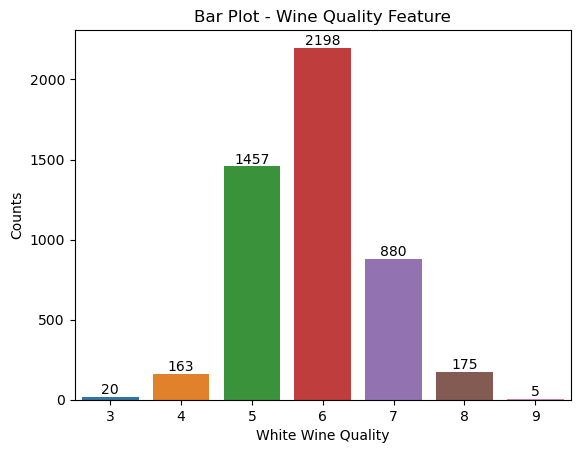

In [85]:
ax = sns.countplot(x='quality', data=White_Wine)
#Show counts at top of Countplot
ax.bar_label(ax.containers[0])
#Title
ax.set_title("Bar Plot - Wine Quality Feature")
#x-axis label
ax.set_xlabel("White Wine Quality")
#y-axis label
ax.set_ylabel("Counts")

From the above it is clear that the quality feature is unevenly distributed with majority of wine samples being of middling/above average quality (5,6,7) whilst bad or exceptional wines are a rarity or even non-existant (No wine samples with a quality value of 1,2 or 10).

Considering the above, we will be making use of the Stratified K-Fold Cross-validation in conjunction with both grid search and random search hyperparameter optimization methods. Making use of this cross-validation technique allows us to obtain individual subsets which are representative of the class distributions highlighted in the above bar plot [19]. Considering the dataset size (Training data has $4898*0.8 \approx 3918 $ entries) priority will be given to training the model. As a result, we will make use of 10-fold cross validation in an attempt to increase training size at every iteration.

<b> Part 2
    
The optimal kernel (Based on default parameter values of 'sklearn.svm.SVR' function) will be selected using Grid-Search Hyperparameter Optimization (applied using 'sklearn.model_selection.GridSearchCV' function [20]). The scoring method utilised to select the 'best' parameter estimates will be the R-squared ($R^{2}$) statistical method described in Task 3. 

In [86]:
#Creating Parameter Grid to select between kernel types 
#(linear, poly, rbf (gaussian), sigmoid)
parameter_grid = {
    'svr__kernel': ['linear','rbf','poly', 'sigmoid']
    }

In [87]:
#Applying GridSearchVC
grid_search = GridSearchCV(Pipeline_SPS, param_grid = parameter_grid, scoring = 'r2',
                           cv = StratifiedKFold(10), verbose = 3)

In [88]:
#Selecting Optimal Parameters using our training set and grid_search
grid_search.fit(PredFeature_train, TargFeature_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


[CV 1/10] END ...............svr__kernel=linear;, score=0.222 total time=   3.4s
[CV 2/10] END ...............svr__kernel=linear;, score=0.193 total time=   3.5s
[CV 3/10] END ...............svr__kernel=linear;, score=0.288 total time=   3.4s
[CV 4/10] END ...............svr__kernel=linear;, score=0.288 total time=   3.1s
[CV 5/10] END ...............svr__kernel=linear;, score=0.250 total time=   3.5s
[CV 6/10] END ...............svr__kernel=linear;, score=0.251 total time=   3.3s
[CV 7/10] END ...............svr__kernel=linear;, score=0.256 total time=   3.2s
[CV 8/10] END ...............svr__kernel=linear;, score=0.252 total time=   3.3s
[CV 9/10] END ...............svr__kernel=linear;, score=0.314 total time=   3.1s
[CV 10/10] END ..............svr__kernel=linear;, score=0.333 total time=   3.2s
[CV 1/10] END ..................svr__kernel=rbf;, score=0.357 total time=   1.7s
[CV 2/10] END ..................svr__kernel=rbf;, score=0.363 total time=   1.7s
[CV 3/10] END ..............

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=0.95)),
                                       ('svr', SVR())]),
             param_grid={'svr__kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='r2', verbose=3)

In [89]:
#Printing Best Hyperparameter Values (Ideal Kernel Selection)
grid_search.best_params_

{'svr__kernel': 'rbf'}

From the above grid search, we note that when utilising default parameter values as defined by 'sklearn.svm.SVR', the optimal kernel selection is 'rbf' which agrees with the kernel selected in [3]. As a result, we will now make use of the random search hyperparameter optimization method to optimize values for gamma, C and epsilon. The random search for each parameter will be carried out on a uniform distribution bounded by and upper and lower limit, with each value in the distribution specified up to 1 decimal place. Let us go over the rational utilised to select the upper and lower bound:
 
 1. gamma: As discussed above, the grid search utilized by Cortez et al. [3] went over the following gamma options: $[2^{3},2^{1},2^{-13},2^{-15}]$. As a result, in our random search optimization method we will be making use of lower bound value of $0$ and restricting the upper bound to the maximum value utilised in [3] $(2^{3})$.
 
 
 2. C: Cortez et al. made use of a value of 3.0 for C, whilst the sklearn implimentation of SVR makes use of 1.0 as a default value (Tested in Task 3). A small value of C may lead to underfitting implying the model will be unable to generalise to new data. On the otherhand, a large value of C may lead to overfitting implying the model will become too specific to the training data [21]. The lower and upper bound will be set at $0$ and $5$ respectively, with our motivation being to check whether relatively small changes in the value of C will be enough to improve performance of model.
 
 
 3. In [22] it was shown that optimal epsilon values would be between 0 and 0.8, whilst the sklearn implimentation of SVR makes use of 0.1 as a default value. Based on this information, our lower and upper bond will be set at $0$ and $1$ respectively to cover this range of values.

<b> N.B: Even with restricted ranges and a distribution specified only up to 1 decimal places, if a grid search hyperparameter optimization is used, the total number of iterations would be equivalent to 44550 iterations. This number of iterations in addition to a cross-validation technique implimentation at each iteration would most likely not be able to run within a reasonable period of time.

<b> Part 3
    
The optimal gamma, epsilon and C values will be selected using Random-Search Hyperparameter Optimization (applied using 'sklearn.model_selection.RandomizedSearchCV' function [23]). Similar to the Grid Seach carried out above, the scoring method utilised to select the 'best' parameter estimates will be the R-squared ($R^{2}$) statistical method. A total of 200 iterations will be carried out in an attempt to obtain an optimal solution.

In [90]:
#Defining Parameter Distribution to select kernel, gamma, epsilon and C values
parameter_dist = {
    'pca__n_components': [0.95],
    'svr__kernel': ['rbf'],
    'svr__gamma': np.arange(0, 8.1, 0.1),
    'svr__epsilon': np.arange(0, 1.1, 0.1),
    'svr__C': np.arange(0, 5.1, 0.1)
    }

In [102]:
#Selecting Optimal Parameters using our training set
rand_search = RandomizedSearchCV(Pipeline_SPS, param_distributions = parameter_dist, n_iter = 200, verbose = 3,
                                  scoring = 'r2', cv = StratifiedKFold(10), random_state = 2077) 

In [103]:
#Import Time (Will be Commented Out in Final Version as not allowed to make use of time library)
#Used to obtain running time to obtain optimal parameters of our training set
#import time

#Marking Start Time (Commented Out)
#start = time.time()

#Selecting Optimal Parameters using our training set and random_search
rand_search.fit(PredFeature_train, TargFeature_train)
#Marking End Time
#end = time.time()

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


[CV 1/10] END pca__n_components=0.95, svr__C=1.4000000000000001, svr__epsilon=1.0, svr__gamma=7.4, svr__kernel=rbf;, score=0.076 total time=   1.0s
[CV 2/10] END pca__n_components=0.95, svr__C=1.4000000000000001, svr__epsilon=1.0, svr__gamma=7.4, svr__kernel=rbf;, score=0.065 total time=   0.7s
[CV 3/10] END pca__n_components=0.95, svr__C=1.4000000000000001, svr__epsilon=1.0, svr__gamma=7.4, svr__kernel=rbf;, score=0.062 total time=   0.8s
[CV 4/10] END pca__n_components=0.95, svr__C=1.4000000000000001, svr__epsilon=1.0, svr__gamma=7.4, svr__kernel=rbf;, score=0.100 total time=   0.7s
[CV 5/10] END pca__n_components=0.95, svr__C=1.4000000000000001, svr__epsilon=1.0, svr__gamma=7.4, svr__kernel=rbf;, score=0.076 total time=   0.7s
[CV 6/10] END pca__n_components=0.95, svr__C=1.4000000000000001, svr__epsilon=1.0, svr__gamma=7.4, svr__kernel=rbf;, score=0.052 total time=   0.7s
[CV 7/10] END pca__n_components=0.95, svr__C=1.4000000000000001, svr__epsilon=1.0, svr__gamma=7.4, svr__kernel=r

[CV 8/10] END pca__n_components=0.95, svr__C=3.7, svr__epsilon=0.4, svr__gamma=4.4, svr__kernel=rbf;, score=0.271 total time=   1.9s
[CV 9/10] END pca__n_components=0.95, svr__C=3.7, svr__epsilon=0.4, svr__gamma=4.4, svr__kernel=rbf;, score=0.266 total time=   2.0s
[CV 10/10] END pca__n_components=0.95, svr__C=3.7, svr__epsilon=0.4, svr__gamma=4.4, svr__kernel=rbf;, score=0.230 total time=   2.0s
[CV 1/10] END pca__n_components=0.95, svr__C=1.7000000000000002, svr__epsilon=0.4, svr__gamma=0.6000000000000001, svr__kernel=rbf;, score=0.420 total time=   1.4s
[CV 2/10] END pca__n_components=0.95, svr__C=1.7000000000000002, svr__epsilon=0.4, svr__gamma=0.6000000000000001, svr__kernel=rbf;, score=0.410 total time=   1.5s
[CV 3/10] END pca__n_components=0.95, svr__C=1.7000000000000002, svr__epsilon=0.4, svr__gamma=0.6000000000000001, svr__kernel=rbf;, score=0.443 total time=   1.4s
[CV 4/10] END pca__n_components=0.95, svr__C=1.7000000000000002, svr__epsilon=0.4, svr__gamma=0.600000000000000

[CV 2/10] END pca__n_components=0.95, svr__C=4.3, svr__epsilon=0.7000000000000001, svr__gamma=1.5, svr__kernel=rbf;, score=0.244 total time=   0.9s
[CV 3/10] END pca__n_components=0.95, svr__C=4.3, svr__epsilon=0.7000000000000001, svr__gamma=1.5, svr__kernel=rbf;, score=0.302 total time=   1.0s
[CV 4/10] END pca__n_components=0.95, svr__C=4.3, svr__epsilon=0.7000000000000001, svr__gamma=1.5, svr__kernel=rbf;, score=0.329 total time=   1.0s
[CV 5/10] END pca__n_components=0.95, svr__C=4.3, svr__epsilon=0.7000000000000001, svr__gamma=1.5, svr__kernel=rbf;, score=0.321 total time=   1.0s
[CV 6/10] END pca__n_components=0.95, svr__C=4.3, svr__epsilon=0.7000000000000001, svr__gamma=1.5, svr__kernel=rbf;, score=0.250 total time=   1.0s
[CV 7/10] END pca__n_components=0.95, svr__C=4.3, svr__epsilon=0.7000000000000001, svr__gamma=1.5, svr__kernel=rbf;, score=0.324 total time=   1.0s
[CV 8/10] END pca__n_components=0.95, svr__C=4.3, svr__epsilon=0.7000000000000001, svr__gamma=1.5, svr__kernel=r

[CV 7/10] END pca__n_components=0.95, svr__C=0.2, svr__epsilon=0.9, svr__gamma=4.7, svr__kernel=rbf;, score=0.079 total time=   1.9s
[CV 8/10] END pca__n_components=0.95, svr__C=0.2, svr__epsilon=0.9, svr__gamma=4.7, svr__kernel=rbf;, score=0.048 total time=   1.5s
[CV 9/10] END pca__n_components=0.95, svr__C=0.2, svr__epsilon=0.9, svr__gamma=4.7, svr__kernel=rbf;, score=0.049 total time=   1.6s
[CV 10/10] END pca__n_components=0.95, svr__C=0.2, svr__epsilon=0.9, svr__gamma=4.7, svr__kernel=rbf;, score=0.042 total time=   1.7s
[CV 1/10] END pca__n_components=0.95, svr__C=4.0, svr__epsilon=0.4, svr__gamma=6.4, svr__kernel=rbf;, score=0.280 total time=   1.7s
[CV 2/10] END pca__n_components=0.95, svr__C=4.0, svr__epsilon=0.4, svr__gamma=6.4, svr__kernel=rbf;, score=0.249 total time=   1.7s
[CV 3/10] END pca__n_components=0.95, svr__C=4.0, svr__epsilon=0.4, svr__gamma=6.4, svr__kernel=rbf;, score=0.249 total time=   1.7s
[CV 4/10] END pca__n_components=0.95, svr__C=4.0, svr__epsilon=0.4, 

[CV 5/10] END pca__n_components=0.95, svr__C=2.1, svr__epsilon=0.7000000000000001, svr__gamma=3.0, svr__kernel=rbf;, score=0.243 total time=   1.7s
[CV 6/10] END pca__n_components=0.95, svr__C=2.1, svr__epsilon=0.7000000000000001, svr__gamma=3.0, svr__kernel=rbf;, score=0.187 total time=   1.6s
[CV 7/10] END pca__n_components=0.95, svr__C=2.1, svr__epsilon=0.7000000000000001, svr__gamma=3.0, svr__kernel=rbf;, score=0.250 total time=   1.5s
[CV 8/10] END pca__n_components=0.95, svr__C=2.1, svr__epsilon=0.7000000000000001, svr__gamma=3.0, svr__kernel=rbf;, score=0.199 total time=   1.6s
[CV 9/10] END pca__n_components=0.95, svr__C=2.1, svr__epsilon=0.7000000000000001, svr__gamma=3.0, svr__kernel=rbf;, score=0.201 total time=   1.5s
[CV 10/10] END pca__n_components=0.95, svr__C=2.1, svr__epsilon=0.7000000000000001, svr__gamma=3.0, svr__kernel=rbf;, score=0.182 total time=   1.5s
[CV 1/10] END pca__n_components=0.95, svr__C=0.8, svr__epsilon=1.0, svr__gamma=3.0, svr__kernel=rbf;, score=0.0

[CV 4/10] END pca__n_components=0.95, svr__C=2.2, svr__epsilon=0.9, svr__gamma=1.3, svr__kernel=rbf;, score=0.238 total time=   0.7s
[CV 5/10] END pca__n_components=0.95, svr__C=2.2, svr__epsilon=0.9, svr__gamma=1.3, svr__kernel=rbf;, score=0.243 total time=   0.7s
[CV 6/10] END pca__n_components=0.95, svr__C=2.2, svr__epsilon=0.9, svr__gamma=1.3, svr__kernel=rbf;, score=0.179 total time=   0.7s
[CV 7/10] END pca__n_components=0.95, svr__C=2.2, svr__epsilon=0.9, svr__gamma=1.3, svr__kernel=rbf;, score=0.239 total time=   0.7s
[CV 8/10] END pca__n_components=0.95, svr__C=2.2, svr__epsilon=0.9, svr__gamma=1.3, svr__kernel=rbf;, score=0.170 total time=   0.6s
[CV 9/10] END pca__n_components=0.95, svr__C=2.2, svr__epsilon=0.9, svr__gamma=1.3, svr__kernel=rbf;, score=0.187 total time=   0.6s
[CV 10/10] END pca__n_components=0.95, svr__C=2.2, svr__epsilon=0.9, svr__gamma=1.3, svr__kernel=rbf;, score=0.177 total time=   0.6s
[CV 1/10] END pca__n_components=0.95, svr__C=4.1000000000000005, svr

[CV 3/10] END pca__n_components=0.95, svr__C=3.5, svr__epsilon=0.6000000000000001, svr__gamma=0.1, svr__kernel=rbf;, score=0.408 total time=   1.0s
[CV 4/10] END pca__n_components=0.95, svr__C=3.5, svr__epsilon=0.6000000000000001, svr__gamma=0.1, svr__kernel=rbf;, score=0.453 total time=   0.9s
[CV 5/10] END pca__n_components=0.95, svr__C=3.5, svr__epsilon=0.6000000000000001, svr__gamma=0.1, svr__kernel=rbf;, score=0.347 total time=   0.9s
[CV 6/10] END pca__n_components=0.95, svr__C=3.5, svr__epsilon=0.6000000000000001, svr__gamma=0.1, svr__kernel=rbf;, score=0.380 total time=   1.1s
[CV 7/10] END pca__n_components=0.95, svr__C=3.5, svr__epsilon=0.6000000000000001, svr__gamma=0.1, svr__kernel=rbf;, score=0.423 total time=   1.1s
[CV 8/10] END pca__n_components=0.95, svr__C=3.5, svr__epsilon=0.6000000000000001, svr__gamma=0.1, svr__kernel=rbf;, score=0.362 total time=   1.1s
[CV 9/10] END pca__n_components=0.95, svr__C=3.5, svr__epsilon=0.6000000000000001, svr__gamma=0.1, svr__kernel=r

[CV 5/10] END pca__n_components=0.95, svr__C=5.0, svr__epsilon=0.1, svr__gamma=7.4, svr__kernel=rbf;, score=0.305 total time=   3.4s
[CV 6/10] END pca__n_components=0.95, svr__C=5.0, svr__epsilon=0.1, svr__gamma=7.4, svr__kernel=rbf;, score=0.263 total time=   3.7s
[CV 7/10] END pca__n_components=0.95, svr__C=5.0, svr__epsilon=0.1, svr__gamma=7.4, svr__kernel=rbf;, score=0.348 total time=   3.3s
[CV 8/10] END pca__n_components=0.95, svr__C=5.0, svr__epsilon=0.1, svr__gamma=7.4, svr__kernel=rbf;, score=0.300 total time=   3.1s
[CV 9/10] END pca__n_components=0.95, svr__C=5.0, svr__epsilon=0.1, svr__gamma=7.4, svr__kernel=rbf;, score=0.288 total time=   3.5s
[CV 10/10] END pca__n_components=0.95, svr__C=5.0, svr__epsilon=0.1, svr__gamma=7.4, svr__kernel=rbf;, score=0.246 total time=   3.8s
[CV 1/10] END pca__n_components=0.95, svr__C=0.4, svr__epsilon=0.1, svr__gamma=4.800000000000001, svr__kernel=rbf;, score=0.213 total time=   2.8s
[CV 2/10] END pca__n_components=0.95, svr__C=0.4, svr_

[CV 10/10] END pca__n_components=0.95, svr__C=3.3000000000000003, svr__epsilon=1.0, svr__gamma=0.1, svr__kernel=rbf;, score=0.336 total time=   0.4s
[CV 1/10] END pca__n_components=0.95, svr__C=4.3, svr__epsilon=0.30000000000000004, svr__gamma=1.2000000000000002, svr__kernel=rbf;, score=0.399 total time=   1.6s
[CV 2/10] END pca__n_components=0.95, svr__C=4.3, svr__epsilon=0.30000000000000004, svr__gamma=1.2000000000000002, svr__kernel=rbf;, score=0.379 total time=   1.6s
[CV 3/10] END pca__n_components=0.95, svr__C=4.3, svr__epsilon=0.30000000000000004, svr__gamma=1.2000000000000002, svr__kernel=rbf;, score=0.431 total time=   1.7s
[CV 4/10] END pca__n_components=0.95, svr__C=4.3, svr__epsilon=0.30000000000000004, svr__gamma=1.2000000000000002, svr__kernel=rbf;, score=0.486 total time=   1.7s
[CV 5/10] END pca__n_components=0.95, svr__C=4.3, svr__epsilon=0.30000000000000004, svr__gamma=1.2000000000000002, svr__kernel=rbf;, score=0.463 total time=   1.8s
[CV 6/10] END pca__n_components

[CV 1/10] END pca__n_components=0.95, svr__C=2.8000000000000003, svr__epsilon=0.7000000000000001, svr__gamma=6.2, svr__kernel=rbf;, score=0.198 total time=   1.8s
[CV 2/10] END pca__n_components=0.95, svr__C=2.8000000000000003, svr__epsilon=0.7000000000000001, svr__gamma=6.2, svr__kernel=rbf;, score=0.174 total time=   1.8s
[CV 3/10] END pca__n_components=0.95, svr__C=2.8000000000000003, svr__epsilon=0.7000000000000001, svr__gamma=6.2, svr__kernel=rbf;, score=0.175 total time=   1.8s
[CV 4/10] END pca__n_components=0.95, svr__C=2.8000000000000003, svr__epsilon=0.7000000000000001, svr__gamma=6.2, svr__kernel=rbf;, score=0.232 total time=   1.7s
[CV 5/10] END pca__n_components=0.95, svr__C=2.8000000000000003, svr__epsilon=0.7000000000000001, svr__gamma=6.2, svr__kernel=rbf;, score=0.193 total time=   1.8s
[CV 6/10] END pca__n_components=0.95, svr__C=2.8000000000000003, svr__epsilon=0.7000000000000001, svr__gamma=6.2, svr__kernel=rbf;, score=0.160 total time=   1.8s
[CV 7/10] END pca__n_c

[CV 7/10] END pca__n_components=0.95, svr__C=0.6000000000000001, svr__epsilon=1.0, svr__gamma=1.8, svr__kernel=rbf;, score=0.117 total time=   0.5s
[CV 8/10] END pca__n_components=0.95, svr__C=0.6000000000000001, svr__epsilon=1.0, svr__gamma=1.8, svr__kernel=rbf;, score=0.075 total time=   0.4s
[CV 9/10] END pca__n_components=0.95, svr__C=0.6000000000000001, svr__epsilon=1.0, svr__gamma=1.8, svr__kernel=rbf;, score=0.083 total time=   0.4s
[CV 10/10] END pca__n_components=0.95, svr__C=0.6000000000000001, svr__epsilon=1.0, svr__gamma=1.8, svr__kernel=rbf;, score=0.080 total time=   0.4s
[CV 1/10] END pca__n_components=0.95, svr__C=2.8000000000000003, svr__epsilon=0.1, svr__gamma=5.5, svr__kernel=rbf;, score=0.326 total time=   3.7s
[CV 2/10] END pca__n_components=0.95, svr__C=2.8000000000000003, svr__epsilon=0.1, svr__gamma=5.5, svr__kernel=rbf;, score=0.297 total time=   3.6s
[CV 3/10] END pca__n_components=0.95, svr__C=2.8000000000000003, svr__epsilon=0.1, svr__gamma=5.5, svr__kernel=

[CV 3/10] END pca__n_components=0.95, svr__C=4.0, svr__epsilon=0.8, svr__gamma=2.4000000000000004, svr__kernel=rbf;, score=0.201 total time=   1.3s
[CV 4/10] END pca__n_components=0.95, svr__C=4.0, svr__epsilon=0.8, svr__gamma=2.4000000000000004, svr__kernel=rbf;, score=0.233 total time=   1.3s
[CV 5/10] END pca__n_components=0.95, svr__C=4.0, svr__epsilon=0.8, svr__gamma=2.4000000000000004, svr__kernel=rbf;, score=0.220 total time=   1.3s
[CV 6/10] END pca__n_components=0.95, svr__C=4.0, svr__epsilon=0.8, svr__gamma=2.4000000000000004, svr__kernel=rbf;, score=0.162 total time=   1.3s
[CV 7/10] END pca__n_components=0.95, svr__C=4.0, svr__epsilon=0.8, svr__gamma=2.4000000000000004, svr__kernel=rbf;, score=0.218 total time=   1.3s
[CV 8/10] END pca__n_components=0.95, svr__C=4.0, svr__epsilon=0.8, svr__gamma=2.4000000000000004, svr__kernel=rbf;, score=0.169 total time=   1.3s
[CV 9/10] END pca__n_components=0.95, svr__C=4.0, svr__epsilon=0.8, svr__gamma=2.4000000000000004, svr__kernel=r

[CV 9/10] END pca__n_components=0.95, svr__C=2.4000000000000004, svr__epsilon=0.6000000000000001, svr__gamma=0.1, svr__kernel=rbf;, score=0.395 total time=   0.8s
[CV 10/10] END pca__n_components=0.95, svr__C=2.4000000000000004, svr__epsilon=0.6000000000000001, svr__gamma=0.1, svr__kernel=rbf;, score=0.375 total time=   0.8s
[CV 1/10] END pca__n_components=0.95, svr__C=3.5, svr__epsilon=1.0, svr__gamma=6.4, svr__kernel=rbf;, score=0.082 total time=   0.7s
[CV 2/10] END pca__n_components=0.95, svr__C=3.5, svr__epsilon=1.0, svr__gamma=6.4, svr__kernel=rbf;, score=0.069 total time=   0.7s
[CV 3/10] END pca__n_components=0.95, svr__C=3.5, svr__epsilon=1.0, svr__gamma=6.4, svr__kernel=rbf;, score=0.068 total time=   0.7s
[CV 4/10] END pca__n_components=0.95, svr__C=3.5, svr__epsilon=1.0, svr__gamma=6.4, svr__kernel=rbf;, score=0.105 total time=   0.8s
[CV 5/10] END pca__n_components=0.95, svr__C=3.5, svr__epsilon=1.0, svr__gamma=6.4, svr__kernel=rbf;, score=0.083 total time=   0.7s
[CV 6/10

[CV 5/10] END pca__n_components=0.95, svr__C=3.3000000000000003, svr__epsilon=0.5, svr__gamma=4.4, svr__kernel=rbf;, score=0.275 total time=   1.8s
[CV 6/10] END pca__n_components=0.95, svr__C=3.3000000000000003, svr__epsilon=0.5, svr__gamma=4.4, svr__kernel=rbf;, score=0.225 total time=   1.7s
[CV 7/10] END pca__n_components=0.95, svr__C=3.3000000000000003, svr__epsilon=0.5, svr__gamma=4.4, svr__kernel=rbf;, score=0.299 total time=   1.7s
[CV 8/10] END pca__n_components=0.95, svr__C=3.3000000000000003, svr__epsilon=0.5, svr__gamma=4.4, svr__kernel=rbf;, score=0.247 total time=   1.8s
[CV 9/10] END pca__n_components=0.95, svr__C=3.3000000000000003, svr__epsilon=0.5, svr__gamma=4.4, svr__kernel=rbf;, score=0.244 total time=   1.7s
[CV 10/10] END pca__n_components=0.95, svr__C=3.3000000000000003, svr__epsilon=0.5, svr__gamma=4.4, svr__kernel=rbf;, score=0.212 total time=   1.9s
[CV 1/10] END pca__n_components=0.95, svr__C=1.3, svr__epsilon=0.8, svr__gamma=2.7, svr__kernel=rbf;, score=0.1

[CV 3/10] END pca__n_components=0.95, svr__C=0.8, svr__epsilon=0.8, svr__gamma=7.4, svr__kernel=rbf;, score=0.115 total time=   1.4s
[CV 4/10] END pca__n_components=0.95, svr__C=0.8, svr__epsilon=0.8, svr__gamma=7.4, svr__kernel=rbf;, score=0.170 total time=   1.6s
[CV 5/10] END pca__n_components=0.95, svr__C=0.8, svr__epsilon=0.8, svr__gamma=7.4, svr__kernel=rbf;, score=0.133 total time=   1.6s
[CV 6/10] END pca__n_components=0.95, svr__C=0.8, svr__epsilon=0.8, svr__gamma=7.4, svr__kernel=rbf;, score=0.109 total time=   1.6s
[CV 7/10] END pca__n_components=0.95, svr__C=0.8, svr__epsilon=0.8, svr__gamma=7.4, svr__kernel=rbf;, score=0.160 total time=   1.6s
[CV 8/10] END pca__n_components=0.95, svr__C=0.8, svr__epsilon=0.8, svr__gamma=7.4, svr__kernel=rbf;, score=0.119 total time=   1.7s
[CV 9/10] END pca__n_components=0.95, svr__C=0.8, svr__epsilon=0.8, svr__gamma=7.4, svr__kernel=rbf;, score=0.116 total time=   1.4s
[CV 10/10] END pca__n_components=0.95, svr__C=0.8, svr__epsilon=0.8, 

[CV 7/10] END pca__n_components=0.95, svr__C=4.6000000000000005, svr__epsilon=1.0, svr__gamma=7.9, svr__kernel=rbf;, score=0.094 total time=   0.8s
[CV 8/10] END pca__n_components=0.95, svr__C=4.6000000000000005, svr__epsilon=1.0, svr__gamma=7.9, svr__kernel=rbf;, score=0.056 total time=   0.7s
[CV 9/10] END pca__n_components=0.95, svr__C=4.6000000000000005, svr__epsilon=1.0, svr__gamma=7.9, svr__kernel=rbf;, score=0.053 total time=   0.7s
[CV 10/10] END pca__n_components=0.95, svr__C=4.6000000000000005, svr__epsilon=1.0, svr__gamma=7.9, svr__kernel=rbf;, score=0.055 total time=   0.7s
[CV 1/10] END pca__n_components=0.95, svr__C=0.6000000000000001, svr__epsilon=0.0, svr__gamma=7.6000000000000005, svr__kernel=rbf;, score=0.251 total time=   3.4s
[CV 2/10] END pca__n_components=0.95, svr__C=0.6000000000000001, svr__epsilon=0.0, svr__gamma=7.6000000000000005, svr__kernel=rbf;, score=0.238 total time=   3.3s
[CV 3/10] END pca__n_components=0.95, svr__C=0.6000000000000001, svr__epsilon=0.0

[CV 4/10] END pca__n_components=0.95, svr__C=0.1, svr__epsilon=0.8, svr__gamma=4.3, svr__kernel=rbf;, score=0.082 total time=   1.5s
[CV 5/10] END pca__n_components=0.95, svr__C=0.1, svr__epsilon=0.8, svr__gamma=4.3, svr__kernel=rbf;, score=0.066 total time=   1.6s
[CV 6/10] END pca__n_components=0.95, svr__C=0.1, svr__epsilon=0.8, svr__gamma=4.3, svr__kernel=rbf;, score=0.056 total time=   1.6s
[CV 7/10] END pca__n_components=0.95, svr__C=0.1, svr__epsilon=0.8, svr__gamma=4.3, svr__kernel=rbf;, score=0.078 total time=   1.6s
[CV 8/10] END pca__n_components=0.95, svr__C=0.1, svr__epsilon=0.8, svr__gamma=4.3, svr__kernel=rbf;, score=0.062 total time=   1.6s
[CV 9/10] END pca__n_components=0.95, svr__C=0.1, svr__epsilon=0.8, svr__gamma=4.3, svr__kernel=rbf;, score=0.059 total time=   1.5s
[CV 10/10] END pca__n_components=0.95, svr__C=0.1, svr__epsilon=0.8, svr__gamma=4.3, svr__kernel=rbf;, score=0.048 total time=   1.5s
[CV 1/10] END pca__n_components=0.95, svr__C=3.5, svr__epsilon=0.1, 

[CV 1/10] END pca__n_components=0.95, svr__C=0.5, svr__epsilon=0.9, svr__gamma=2.5, svr__kernel=rbf;, score=0.109 total time=   1.2s
[CV 2/10] END pca__n_components=0.95, svr__C=0.5, svr__epsilon=0.9, svr__gamma=2.5, svr__kernel=rbf;, score=0.093 total time=   1.3s
[CV 3/10] END pca__n_components=0.95, svr__C=0.5, svr__epsilon=0.9, svr__gamma=2.5, svr__kernel=rbf;, score=0.098 total time=   1.3s
[CV 4/10] END pca__n_components=0.95, svr__C=0.5, svr__epsilon=0.9, svr__gamma=2.5, svr__kernel=rbf;, score=0.135 total time=   1.2s
[CV 5/10] END pca__n_components=0.95, svr__C=0.5, svr__epsilon=0.9, svr__gamma=2.5, svr__kernel=rbf;, score=0.114 total time=   1.3s
[CV 6/10] END pca__n_components=0.95, svr__C=0.5, svr__epsilon=0.9, svr__gamma=2.5, svr__kernel=rbf;, score=0.078 total time=   1.3s
[CV 7/10] END pca__n_components=0.95, svr__C=0.5, svr__epsilon=0.9, svr__gamma=2.5, svr__kernel=rbf;, score=0.126 total time=   1.3s
[CV 8/10] END pca__n_components=0.95, svr__C=0.5, svr__epsilon=0.9, s

[CV 8/10] END pca__n_components=0.95, svr__C=0.2, svr__epsilon=0.8, svr__gamma=7.800000000000001, svr__kernel=rbf;, score=0.082 total time=   1.4s
[CV 9/10] END pca__n_components=0.95, svr__C=0.2, svr__epsilon=0.8, svr__gamma=7.800000000000001, svr__kernel=rbf;, score=0.081 total time=   1.5s
[CV 10/10] END pca__n_components=0.95, svr__C=0.2, svr__epsilon=0.8, svr__gamma=7.800000000000001, svr__kernel=rbf;, score=0.068 total time=   1.5s
[CV 1/10] END pca__n_components=0.95, svr__C=0.1, svr__epsilon=0.6000000000000001, svr__gamma=4.2, svr__kernel=rbf;, score=0.019 total time=   1.5s
[CV 2/10] END pca__n_components=0.95, svr__C=0.1, svr__epsilon=0.6000000000000001, svr__gamma=4.2, svr__kernel=rbf;, score=0.013 total time=   1.5s
[CV 3/10] END pca__n_components=0.95, svr__C=0.1, svr__epsilon=0.6000000000000001, svr__gamma=4.2, svr__kernel=rbf;, score=0.005 total time=   1.5s
[CV 4/10] END pca__n_components=0.95, svr__C=0.1, svr__epsilon=0.6000000000000001, svr__gamma=4.2, svr__kernel=rbf

[CV 4/10] END pca__n_components=0.95, svr__C=3.2, svr__epsilon=0.30000000000000004, svr__gamma=0.30000000000000004, svr__kernel=rbf;, score=0.464 total time=   2.0s
[CV 5/10] END pca__n_components=0.95, svr__C=3.2, svr__epsilon=0.30000000000000004, svr__gamma=0.30000000000000004, svr__kernel=rbf;, score=0.428 total time=   2.1s
[CV 6/10] END pca__n_components=0.95, svr__C=3.2, svr__epsilon=0.30000000000000004, svr__gamma=0.30000000000000004, svr__kernel=rbf;, score=0.420 total time=   2.0s
[CV 7/10] END pca__n_components=0.95, svr__C=3.2, svr__epsilon=0.30000000000000004, svr__gamma=0.30000000000000004, svr__kernel=rbf;, score=0.498 total time=   2.2s
[CV 8/10] END pca__n_components=0.95, svr__C=3.2, svr__epsilon=0.30000000000000004, svr__gamma=0.30000000000000004, svr__kernel=rbf;, score=0.395 total time=   2.1s
[CV 9/10] END pca__n_components=0.95, svr__C=3.2, svr__epsilon=0.30000000000000004, svr__gamma=0.30000000000000004, svr__kernel=rbf;, score=0.429 total time=   2.0s
[CV 10/10]

[CV 8/10] END pca__n_components=0.95, svr__C=0.9, svr__epsilon=0.6000000000000001, svr__gamma=7.0, svr__kernel=rbf;, score=0.192 total time=   1.6s
[CV 9/10] END pca__n_components=0.95, svr__C=0.9, svr__epsilon=0.6000000000000001, svr__gamma=7.0, svr__kernel=rbf;, score=0.188 total time=   1.6s
[CV 10/10] END pca__n_components=0.95, svr__C=0.9, svr__epsilon=0.6000000000000001, svr__gamma=7.0, svr__kernel=rbf;, score=0.162 total time=   1.7s
[CV 1/10] END pca__n_components=0.95, svr__C=1.1, svr__epsilon=0.5, svr__gamma=1.3, svr__kernel=rbf;, score=0.342 total time=   1.0s
[CV 2/10] END pca__n_components=0.95, svr__C=1.1, svr__epsilon=0.5, svr__gamma=1.3, svr__kernel=rbf;, score=0.325 total time=   1.1s
[CV 3/10] END pca__n_components=0.95, svr__C=1.1, svr__epsilon=0.5, svr__gamma=1.3, svr__kernel=rbf;, score=0.366 total time=   1.0s
[CV 4/10] END pca__n_components=0.95, svr__C=1.1, svr__epsilon=0.5, svr__gamma=1.3, svr__kernel=rbf;, score=0.406 total time=   1.0s
[CV 5/10] END pca__n_co

[CV 2/10] END pca__n_components=0.95, svr__C=1.2000000000000002, svr__epsilon=0.1, svr__gamma=4.7, svr__kernel=rbf;, score=0.297 total time=   3.2s
[CV 3/10] END pca__n_components=0.95, svr__C=1.2000000000000002, svr__epsilon=0.1, svr__gamma=4.7, svr__kernel=rbf;, score=0.298 total time=   3.1s
[CV 4/10] END pca__n_components=0.95, svr__C=1.2000000000000002, svr__epsilon=0.1, svr__gamma=4.7, svr__kernel=rbf;, score=0.368 total time=   3.2s
[CV 5/10] END pca__n_components=0.95, svr__C=1.2000000000000002, svr__epsilon=0.1, svr__gamma=4.7, svr__kernel=rbf;, score=0.323 total time=   3.2s
[CV 6/10] END pca__n_components=0.95, svr__C=1.2000000000000002, svr__epsilon=0.1, svr__gamma=4.7, svr__kernel=rbf;, score=0.268 total time=   3.2s
[CV 7/10] END pca__n_components=0.95, svr__C=1.2000000000000002, svr__epsilon=0.1, svr__gamma=4.7, svr__kernel=rbf;, score=0.357 total time=   3.1s
[CV 8/10] END pca__n_components=0.95, svr__C=1.2000000000000002, svr__epsilon=0.1, svr__gamma=4.7, svr__kernel=r

[CV 9/10] END pca__n_components=0.95, svr__C=2.0, svr__epsilon=0.2, svr__gamma=7.5, svr__kernel=rbf;, score=0.270 total time=   2.7s
[CV 10/10] END pca__n_components=0.95, svr__C=2.0, svr__epsilon=0.2, svr__gamma=7.5, svr__kernel=rbf;, score=0.231 total time=   2.7s
[CV 1/10] END pca__n_components=0.95, svr__C=2.0, svr__epsilon=0.6000000000000001, svr__gamma=3.2, svr__kernel=rbf;, score=0.261 total time=   1.3s
[CV 2/10] END pca__n_components=0.95, svr__C=2.0, svr__epsilon=0.6000000000000001, svr__gamma=3.2, svr__kernel=rbf;, score=0.228 total time=   1.4s
[CV 3/10] END pca__n_components=0.95, svr__C=2.0, svr__epsilon=0.6000000000000001, svr__gamma=3.2, svr__kernel=rbf;, score=0.254 total time=   1.7s
[CV 4/10] END pca__n_components=0.95, svr__C=2.0, svr__epsilon=0.6000000000000001, svr__gamma=3.2, svr__kernel=rbf;, score=0.300 total time=   1.5s
[CV 5/10] END pca__n_components=0.95, svr__C=2.0, svr__epsilon=0.6000000000000001, svr__gamma=3.2, svr__kernel=rbf;, score=0.274 total time= 

[CV 8/10] END pca__n_components=0.95, svr__C=1.1, svr__epsilon=1.0, svr__gamma=0.8, svr__kernel=rbf;, score=0.220 total time=   0.3s
[CV 9/10] END pca__n_components=0.95, svr__C=1.1, svr__epsilon=1.0, svr__gamma=0.8, svr__kernel=rbf;, score=0.240 total time=   0.3s
[CV 10/10] END pca__n_components=0.95, svr__C=1.1, svr__epsilon=1.0, svr__gamma=0.8, svr__kernel=rbf;, score=0.238 total time=   0.3s
[CV 1/10] END pca__n_components=0.95, svr__C=2.2, svr__epsilon=0.4, svr__gamma=4.0, svr__kernel=rbf;, score=0.302 total time=   2.0s
[CV 2/10] END pca__n_components=0.95, svr__C=2.2, svr__epsilon=0.4, svr__gamma=4.0, svr__kernel=rbf;, score=0.267 total time=   1.9s
[CV 3/10] END pca__n_components=0.95, svr__C=2.2, svr__epsilon=0.4, svr__gamma=4.0, svr__kernel=rbf;, score=0.287 total time=   1.9s
[CV 4/10] END pca__n_components=0.95, svr__C=2.2, svr__epsilon=0.4, svr__gamma=4.0, svr__kernel=rbf;, score=0.344 total time=   1.9s
[CV 5/10] END pca__n_components=0.95, svr__C=2.2, svr__epsilon=0.4, 

[CV 3/10] END pca__n_components=0.95, svr__C=1.8, svr__epsilon=0.0, svr__gamma=3.0, svr__kernel=rbf;, score=0.376 total time=   3.2s
[CV 4/10] END pca__n_components=0.95, svr__C=1.8, svr__epsilon=0.0, svr__gamma=3.0, svr__kernel=rbf;, score=0.427 total time=   3.2s
[CV 5/10] END pca__n_components=0.95, svr__C=1.8, svr__epsilon=0.0, svr__gamma=3.0, svr__kernel=rbf;, score=0.399 total time=   3.4s
[CV 6/10] END pca__n_components=0.95, svr__C=1.8, svr__epsilon=0.0, svr__gamma=3.0, svr__kernel=rbf;, score=0.309 total time=   3.2s
[CV 7/10] END pca__n_components=0.95, svr__C=1.8, svr__epsilon=0.0, svr__gamma=3.0, svr__kernel=rbf;, score=0.415 total time=   3.2s
[CV 8/10] END pca__n_components=0.95, svr__C=1.8, svr__epsilon=0.0, svr__gamma=3.0, svr__kernel=rbf;, score=0.345 total time=   3.1s
[CV 9/10] END pca__n_components=0.95, svr__C=1.8, svr__epsilon=0.0, svr__gamma=3.0, svr__kernel=rbf;, score=0.353 total time=   3.2s
[CV 10/10] END pca__n_components=0.95, svr__C=1.8, svr__epsilon=0.0, 

[CV 9/10] END pca__n_components=0.95, svr__C=2.9000000000000004, svr__epsilon=0.2, svr__gamma=5.0, svr__kernel=rbf;, score=0.287 total time=   2.8s
[CV 10/10] END pca__n_components=0.95, svr__C=2.9000000000000004, svr__epsilon=0.2, svr__gamma=5.0, svr__kernel=rbf;, score=0.246 total time=   2.7s
[CV 1/10] END pca__n_components=0.95, svr__C=1.9000000000000001, svr__epsilon=0.0, svr__gamma=6.6000000000000005, svr__kernel=rbf;, score=0.322 total time=   4.0s
[CV 2/10] END pca__n_components=0.95, svr__C=1.9000000000000001, svr__epsilon=0.0, svr__gamma=6.6000000000000005, svr__kernel=rbf;, score=0.295 total time=   4.0s
[CV 3/10] END pca__n_components=0.95, svr__C=1.9000000000000001, svr__epsilon=0.0, svr__gamma=6.6000000000000005, svr__kernel=rbf;, score=0.296 total time=   3.9s
[CV 4/10] END pca__n_components=0.95, svr__C=1.9000000000000001, svr__epsilon=0.0, svr__gamma=6.6000000000000005, svr__kernel=rbf;, score=0.368 total time=   3.9s
[CV 5/10] END pca__n_components=0.95, svr__C=1.9000

[CV 6/10] END pca__n_components=0.95, svr__C=0.9, svr__epsilon=0.30000000000000004, svr__gamma=3.2, svr__kernel=rbf;, score=0.260 total time=   1.6s
[CV 7/10] END pca__n_components=0.95, svr__C=0.9, svr__epsilon=0.30000000000000004, svr__gamma=3.2, svr__kernel=rbf;, score=0.350 total time=   1.6s
[CV 8/10] END pca__n_components=0.95, svr__C=0.9, svr__epsilon=0.30000000000000004, svr__gamma=3.2, svr__kernel=rbf;, score=0.291 total time=   1.6s
[CV 9/10] END pca__n_components=0.95, svr__C=0.9, svr__epsilon=0.30000000000000004, svr__gamma=3.2, svr__kernel=rbf;, score=0.292 total time=   1.8s
[CV 10/10] END pca__n_components=0.95, svr__C=0.9, svr__epsilon=0.30000000000000004, svr__gamma=3.2, svr__kernel=rbf;, score=0.249 total time=   1.9s
[CV 1/10] END pca__n_components=0.95, svr__C=0.2, svr__epsilon=1.0, svr__gamma=7.2, svr__kernel=rbf;, score=0.014 total time=   1.0s
[CV 2/10] END pca__n_components=0.95, svr__C=0.2, svr__epsilon=1.0, svr__gamma=7.2, svr__kernel=rbf;, score=0.017 total t

[CV 4/10] END pca__n_components=0.95, svr__C=0.30000000000000004, svr__epsilon=0.9, svr__gamma=0.6000000000000001, svr__kernel=rbf;, score=0.230 total time=   0.5s
[CV 5/10] END pca__n_components=0.95, svr__C=0.30000000000000004, svr__epsilon=0.9, svr__gamma=0.6000000000000001, svr__kernel=rbf;, score=0.245 total time=   0.5s
[CV 6/10] END pca__n_components=0.95, svr__C=0.30000000000000004, svr__epsilon=0.9, svr__gamma=0.6000000000000001, svr__kernel=rbf;, score=0.199 total time=   0.5s
[CV 7/10] END pca__n_components=0.95, svr__C=0.30000000000000004, svr__epsilon=0.9, svr__gamma=0.6000000000000001, svr__kernel=rbf;, score=0.261 total time=   0.5s
[CV 8/10] END pca__n_components=0.95, svr__C=0.30000000000000004, svr__epsilon=0.9, svr__gamma=0.6000000000000001, svr__kernel=rbf;, score=0.184 total time=   0.5s
[CV 9/10] END pca__n_components=0.95, svr__C=0.30000000000000004, svr__epsilon=0.9, svr__gamma=0.6000000000000001, svr__kernel=rbf;, score=0.204 total time=   0.5s
[CV 10/10] END p

[CV 6/10] END pca__n_components=0.95, svr__C=3.3000000000000003, svr__epsilon=0.8, svr__gamma=7.1000000000000005, svr__kernel=rbf;, score=0.123 total time=   1.6s
[CV 7/10] END pca__n_components=0.95, svr__C=3.3000000000000003, svr__epsilon=0.8, svr__gamma=7.1000000000000005, svr__kernel=rbf;, score=0.176 total time=   1.7s
[CV 8/10] END pca__n_components=0.95, svr__C=3.3000000000000003, svr__epsilon=0.8, svr__gamma=7.1000000000000005, svr__kernel=rbf;, score=0.133 total time=   1.7s
[CV 9/10] END pca__n_components=0.95, svr__C=3.3000000000000003, svr__epsilon=0.8, svr__gamma=7.1000000000000005, svr__kernel=rbf;, score=0.130 total time=   1.7s
[CV 10/10] END pca__n_components=0.95, svr__C=3.3000000000000003, svr__epsilon=0.8, svr__gamma=7.1000000000000005, svr__kernel=rbf;, score=0.118 total time=   1.6s
[CV 1/10] END pca__n_components=0.95, svr__C=4.3, svr__epsilon=0.4, svr__gamma=3.7, svr__kernel=rbf;, score=0.304 total time=   2.0s
[CV 2/10] END pca__n_components=0.95, svr__C=4.3, s

[CV 4/10] END pca__n_components=0.95, svr__C=1.3, svr__epsilon=0.1, svr__gamma=2.2, svr__kernel=rbf;, score=0.444 total time=   2.4s
[CV 5/10] END pca__n_components=0.95, svr__C=1.3, svr__epsilon=0.1, svr__gamma=2.2, svr__kernel=rbf;, score=0.428 total time=   2.3s
[CV 6/10] END pca__n_components=0.95, svr__C=1.3, svr__epsilon=0.1, svr__gamma=2.2, svr__kernel=rbf;, score=0.325 total time=   2.4s
[CV 7/10] END pca__n_components=0.95, svr__C=1.3, svr__epsilon=0.1, svr__gamma=2.2, svr__kernel=rbf;, score=0.440 total time=   2.3s
[CV 8/10] END pca__n_components=0.95, svr__C=1.3, svr__epsilon=0.1, svr__gamma=2.2, svr__kernel=rbf;, score=0.359 total time=   2.3s
[CV 9/10] END pca__n_components=0.95, svr__C=1.3, svr__epsilon=0.1, svr__gamma=2.2, svr__kernel=rbf;, score=0.373 total time=   2.4s
[CV 10/10] END pca__n_components=0.95, svr__C=1.3, svr__epsilon=0.1, svr__gamma=2.2, svr__kernel=rbf;, score=0.332 total time=   2.5s
[CV 1/10] END pca__n_components=0.95, svr__C=0.1, svr__epsilon=0.5, 

[CV 1/10] END pca__n_components=0.95, svr__C=2.1, svr__epsilon=0.6000000000000001, svr__gamma=7.800000000000001, svr__kernel=rbf;, score=0.227 total time=   1.8s
[CV 2/10] END pca__n_components=0.95, svr__C=2.1, svr__epsilon=0.6000000000000001, svr__gamma=7.800000000000001, svr__kernel=rbf;, score=0.200 total time=   1.7s
[CV 3/10] END pca__n_components=0.95, svr__C=2.1, svr__epsilon=0.6000000000000001, svr__gamma=7.800000000000001, svr__kernel=rbf;, score=0.196 total time=   1.6s
[CV 4/10] END pca__n_components=0.95, svr__C=2.1, svr__epsilon=0.6000000000000001, svr__gamma=7.800000000000001, svr__kernel=rbf;, score=0.262 total time=   1.7s
[CV 5/10] END pca__n_components=0.95, svr__C=2.1, svr__epsilon=0.6000000000000001, svr__gamma=7.800000000000001, svr__kernel=rbf;, score=0.215 total time=   1.6s
[CV 6/10] END pca__n_components=0.95, svr__C=2.1, svr__epsilon=0.6000000000000001, svr__gamma=7.800000000000001, svr__kernel=rbf;, score=0.185 total time=   1.6s
[CV 7/10] END pca__n_compone

[CV 4/10] END pca__n_components=0.95, svr__C=0.1, svr__epsilon=0.9, svr__gamma=6.7, svr__kernel=rbf;, score=0.054 total time=   1.6s
[CV 5/10] END pca__n_components=0.95, svr__C=0.1, svr__epsilon=0.9, svr__gamma=6.7, svr__kernel=rbf;, score=0.038 total time=   1.6s
[CV 6/10] END pca__n_components=0.95, svr__C=0.1, svr__epsilon=0.9, svr__gamma=6.7, svr__kernel=rbf;, score=0.033 total time=   1.5s
[CV 7/10] END pca__n_components=0.95, svr__C=0.1, svr__epsilon=0.9, svr__gamma=6.7, svr__kernel=rbf;, score=0.052 total time=   1.6s
[CV 8/10] END pca__n_components=0.95, svr__C=0.1, svr__epsilon=0.9, svr__gamma=6.7, svr__kernel=rbf;, score=0.036 total time=   1.5s
[CV 9/10] END pca__n_components=0.95, svr__C=0.1, svr__epsilon=0.9, svr__gamma=6.7, svr__kernel=rbf;, score=0.037 total time=   1.5s
[CV 10/10] END pca__n_components=0.95, svr__C=0.1, svr__epsilon=0.9, svr__gamma=6.7, svr__kernel=rbf;, score=0.030 total time=   1.6s
[CV 1/10] END pca__n_components=0.95, svr__C=1.5, svr__epsilon=1.0, 

[CV 2/10] END pca__n_components=0.95, svr__C=0.30000000000000004, svr__epsilon=0.5, svr__gamma=6.2, svr__kernel=rbf;, score=0.117 total time=   1.6s
[CV 3/10] END pca__n_components=0.95, svr__C=0.30000000000000004, svr__epsilon=0.5, svr__gamma=6.2, svr__kernel=rbf;, score=0.099 total time=   1.6s
[CV 4/10] END pca__n_components=0.95, svr__C=0.30000000000000004, svr__epsilon=0.5, svr__gamma=6.2, svr__kernel=rbf;, score=0.165 total time=   1.6s
[CV 5/10] END pca__n_components=0.95, svr__C=0.30000000000000004, svr__epsilon=0.5, svr__gamma=6.2, svr__kernel=rbf;, score=0.124 total time=   1.6s
[CV 6/10] END pca__n_components=0.95, svr__C=0.30000000000000004, svr__epsilon=0.5, svr__gamma=6.2, svr__kernel=rbf;, score=0.103 total time=   1.6s
[CV 7/10] END pca__n_components=0.95, svr__C=0.30000000000000004, svr__epsilon=0.5, svr__gamma=6.2, svr__kernel=rbf;, score=0.154 total time=   1.6s
[CV 8/10] END pca__n_components=0.95, svr__C=0.30000000000000004, svr__epsilon=0.5, svr__gamma=6.2, svr__k

[CV 8/10] END pca__n_components=0.95, svr__C=4.7, svr__epsilon=0.5, svr__gamma=0.30000000000000004, svr__kernel=rbf;, score=0.366 total time=   1.7s
[CV 9/10] END pca__n_components=0.95, svr__C=4.7, svr__epsilon=0.5, svr__gamma=0.30000000000000004, svr__kernel=rbf;, score=0.389 total time=   1.4s
[CV 10/10] END pca__n_components=0.95, svr__C=4.7, svr__epsilon=0.5, svr__gamma=0.30000000000000004, svr__kernel=rbf;, score=0.383 total time=   1.5s
[CV 1/10] END pca__n_components=0.95, svr__C=2.4000000000000004, svr__epsilon=1.0, svr__gamma=6.9, svr__kernel=rbf;, score=0.080 total time=   0.8s
[CV 2/10] END pca__n_components=0.95, svr__C=2.4000000000000004, svr__epsilon=1.0, svr__gamma=6.9, svr__kernel=rbf;, score=0.068 total time=   0.7s
[CV 3/10] END pca__n_components=0.95, svr__C=2.4000000000000004, svr__epsilon=1.0, svr__gamma=6.9, svr__kernel=rbf;, score=0.066 total time=   0.7s
[CV 4/10] END pca__n_components=0.95, svr__C=2.4000000000000004, svr__epsilon=1.0, svr__gamma=6.9, svr__kern

[CV 2/10] END pca__n_components=0.95, svr__C=0.1, svr__epsilon=0.30000000000000004, svr__gamma=3.9000000000000004, svr__kernel=rbf;, score=0.023 total time=   2.5s
[CV 3/10] END pca__n_components=0.95, svr__C=0.1, svr__epsilon=0.30000000000000004, svr__gamma=3.9000000000000004, svr__kernel=rbf;, score=0.016 total time=   2.5s
[CV 4/10] END pca__n_components=0.95, svr__C=0.1, svr__epsilon=0.30000000000000004, svr__gamma=3.9000000000000004, svr__kernel=rbf;, score=0.052 total time=   2.4s
[CV 5/10] END pca__n_components=0.95, svr__C=0.1, svr__epsilon=0.30000000000000004, svr__gamma=3.9000000000000004, svr__kernel=rbf;, score=0.033 total time=   2.4s
[CV 6/10] END pca__n_components=0.95, svr__C=0.1, svr__epsilon=0.30000000000000004, svr__gamma=3.9000000000000004, svr__kernel=rbf;, score=0.018 total time=   2.5s
[CV 7/10] END pca__n_components=0.95, svr__C=0.1, svr__epsilon=0.30000000000000004, svr__gamma=3.9000000000000004, svr__kernel=rbf;, score=0.046 total time=   2.5s
[CV 8/10] END pc

[CV 5/10] END pca__n_components=0.95, svr__C=3.0, svr__epsilon=0.5, svr__gamma=3.0, svr__kernel=rbf;, score=0.315 total time=   1.5s
[CV 6/10] END pca__n_components=0.95, svr__C=3.0, svr__epsilon=0.5, svr__gamma=3.0, svr__kernel=rbf;, score=0.249 total time=   1.4s
[CV 7/10] END pca__n_components=0.95, svr__C=3.0, svr__epsilon=0.5, svr__gamma=3.0, svr__kernel=rbf;, score=0.326 total time=   1.6s
[CV 8/10] END pca__n_components=0.95, svr__C=3.0, svr__epsilon=0.5, svr__gamma=3.0, svr__kernel=rbf;, score=0.266 total time=   1.6s
[CV 9/10] END pca__n_components=0.95, svr__C=3.0, svr__epsilon=0.5, svr__gamma=3.0, svr__kernel=rbf;, score=0.270 total time=   1.7s
[CV 10/10] END pca__n_components=0.95, svr__C=3.0, svr__epsilon=0.5, svr__gamma=3.0, svr__kernel=rbf;, score=0.238 total time=   1.5s
[CV 1/10] END pca__n_components=0.95, svr__C=1.1, svr__epsilon=0.4, svr__gamma=0.5, svr__kernel=rbf;, score=0.413 total time=   1.3s
[CV 2/10] END pca__n_components=0.95, svr__C=1.1, svr__epsilon=0.4, 

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('pca', PCA(n_components=0.95)),
                                             ('svr', SVR())]),
                   n_iter=200,
                   param_distributions={'pca__n_components': [0.95],
                                        'svr__C': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2....
                                        'svr__gamma': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,

In [104]:
#Printing Best Hyperparameter Values (Ideal gamma, epsilon and C)
rand_search.best_params_

{'svr__kernel': 'rbf',
 'svr__gamma': 0.6000000000000001,
 'svr__epsilon': 0.0,
 'svr__C': 2.3000000000000003,
 'pca__n_components': 0.95}

In [129]:
#Printing time to obtain above optimal parameters
Total_Time = end - start
print('The Number of Minutes Random Search took to run 200 Iterations was {} minutes'.format(round(Total_Time/60,2)))

The Number of Minutes Random Search took to run 200 Iterations was 60.91 minutes


From the above random search hyperparameter optimization method we obtained the following optimal parameter values:
   
   1. gamma = 0.6
   
   2. epsilon = 0
   
   3. C = 2.3

The random search hyperparameter optimization method was allowed to run for 200 Iterations (A total of 2000 iterations required since the stratified 10-Fold Cross-validation technique was utilised at every iteration). In total, a running time of approximately 1 hour was required to obtain the final results.

<b> Train and test the pipeline with the opimized hyperparameters, and compare the performance to the pipeline in Task 3.

We will start of by predicting Data using model (with parameter obtain using Random Search Hyperparameter Optimization) applied on PredFeature_test.

In [105]:
#Training the pipeline using the optimized hyperparameters obtained from our
#random search hyperparameter optimization method 
TargFeature_test_HyperOptpred = rand_search.predict(PredFeature_test)

In [106]:
#Obtaining Mean Absolute Error Value
MAE_OP = mean_absolute_error(TargFeature_test, TargFeature_test_HyperOptpred)
MAE_OP

0.4660209553477865

In [107]:
#Obtaining Mean Squared Error Values
MSE_OP = mean_squared_error(TargFeature_test, TargFeature_test_HyperOptpred)
MSE_OP

0.4977685332104719

In [108]:
#Obtaining Root Mean Squared Error values
RMSE_OP = mean_squared_error(TargFeature_test, TargFeature_test_HyperOptpred, squared = False)
RMSE_OP

0.7055271314488706

In [109]:
#Obtaining R-Square results 
R2_OP = r2_score(TargFeature_test, TargFeature_test_HyperOptpred)
R2_OP

0.3987151905766273

Let us now compare the performance obtained when using the parameters obtained following random search hyperparaeter optimization against those obtained by the pipeline defined in Task 3. To do so let us create a pandas dataframe with the following columns:
   
   1. Performance Evaluation Results Pipeline Task 3
   
   2. Performance Evaluation Results Pipeline Task 4
   
   3. Difference (Task 3 - Task 4)

In [111]:
#Defining Data for Dataframe
Performance_data = {'Performance Evaluation Results Pipeline Task 3': [round(MAE_NP,4), round(MSE_NP,4), round(RMSE_NP,4), round(R2_NP,4)],
                    'Performance Evaluation Results Pipeline Task 4': [round(MAE_OP,4), round(MSE_OP,4), round(RMSE_OP,4), round(R2_OP,4)],
                    'Difference (Task 3 - Task 4)': [round(MAE_NP-MAE_OP,4), round(MSE_NP - MSE_OP,4), round(RMSE_NP - RMSE_OP,4), round(R2_NP - R2_OP,4)]} 
#Creating DataFrame
Performance_df = pd.DataFrame(data = Performance_data, index = ['MAE', 'MSE', 'RMSE', 'R2'])
#Calling DataFrame
Performance_df

Performance Evaluation Results Pipeline Task 3  \
MAE                                           0.5460   
MSE                                           0.5229   
RMSE                                          0.7231   
R2                                            0.3684   

      Performance Evaluation Results Pipeline Task 4  \
MAE                                           0.4660   
MSE                                           0.4978   
RMSE                                          0.7055   
R2                                            0.3987   

      Difference (Task 3 - Task 4)  
MAE                         0.0800  
MSE                         0.0251  
RMSE                        0.0176  
R2                         -0.0303

Recall that MAE, MSE and RMSE are loss functions indicating how well the algorithms defined in Task 3 and Task 4 model our dataset. A lower MAR, MSE and RMSE indicate a better performing model for our test data [15].

As we are subtracting Task 4 from Task 3, a positive difference for MAE, MSE and RMSE indicates that the model with optimized hyperparameters performed better. Indeed, as can be seen from the above table, all three performance metrics obtained better results when making use of the parameter values obtained following random search hyperparameter optimization.

On the otherhand, a higher R-Squared (R2) result (bounded up to 1) indicates that the predicted values of a model explain better the observed values when compared to a model with a lower R-square result.

As we are subtracting Task 4 from Task 3, a negative difference for R2 indicates that the model with optimized hyperparameters performed better. Indeed, as can be seen from the above table, better R2 results were obtained when making use of the parameter values obtained following random search hyperparameter optimization.

## Conclusion (10 marks)

<b> Discuss the characteristics of the dataset and how they might affect the model performance

In Task 1, we carried out a brief exploratory data analysis on the white wine dataset to understand the characteristics of this dataset. From this data analysis we can note that the following attributes might have affected the performance of our final model:

   1. The target feature (wine quality) is imbalanced. This could impact model performance, since final model will be less capable at classifying minority classes. Indeed, the model might become biased towards more prevalent classes. As an example, in our dataset there are only 5 entries with a quality value of 9. Thus, our final model will have very little experience on what feature values constitute a wine with a quality value of 9.
   
   
   2. The majority of features in the white wine dataset have a number of outlier entries. Whilst these were not removed, as they explain the natural variability in our dataset, they still might be negatively impacting model performance especially since SVM are sensitive to outliers [18].
   
   
   3. The precence of multicollinearity in our data was also detected when examining how features relate to each other. Whilst model performance may not be impacted significantly, it mght make diminish ones' ability to determine the effects of individual features in model [6]. 

<b> Comment on any insights from the dimensionality reduction using PCA.

In our PCA implimentation, we wanted to retain at least 95% variance of the original data. To do so, we had to include 9 components (down from the original 11 components). The relatiively low number of dropped components indicates that most of the original variables provide unique patterns altough some variables do not seem to contribute much to the variance in the data. This agrees with findings in Task 1, whereby some variables were heavily correlated with each other [25].

<b> Comment on the suitability of the SVM regressor for this particular task

According to [3], advantages of the SVM regressor include:
   
   1. Higher Flexibility
   
   2. Non-Linear learning capabilities
   
   3. Absence of local minmum in training phase (Gurantees an optimal fit)
   
In terms of interpreting results, the use of an SVM regressor is less than ideal. The results obtained by the model for our target variable are continuous figures and not discrete ordinal values ranging from $0$ to $10$. Thus to obtain predicted results in a similar form as observed results, one must use some form of tolerence to round predicted values to the nearest class. Other Machine learning algorithms such as Decision Tree and Random Forests could have been utilised to obtain more interpretable results (No comment can be made on the performance of these models on the White Wine dataset however)

<b> Comment on the performance of the initial SVM pipeline, and on the
effect of hyperparameters optimization.

In [3], the Mean absolute deviation results were made available after applying their Multiple regression (MR), Neural Networks (NNs) and  Support Vector Machines (SVMs) models on their testing set. The results obtained, for the white wine dataset, were as follows:
   
   1. MAE for MR model = 0.59
   
   2. MAE for NN model = 0.58
   
   3. MAE for SVM model = 0.45

Our initial SVM model obtained an MAE value of 0.5460. Taking figures at face value and not checking for statistical significance, we can note that without any hyperparameter optimization our model performed better than the MR and NN models but worse than the SVM model.

On the other hand, following hyperparameter optimization we obtained an MAE value of 0.4660 which brings us closer to the 0.45 MAE value obtained by the SVM model in [3]. 

Having said that, one particular affect that hyperparameter optimization had on our SVM regressor is that we now have an overfitted model. This can be seen by comparing the performance metric results obtained on the training set with those obtained on the testing set.

In [114]:
TargFeature_train_HyperOptpred = rand_search.predict(PredFeature_train)
#Defining Performance Metrics carried out on training set
MAE_Train_OP = mean_absolute_error(TargFeature_train, TargFeature_train_HyperOptpred)
MSE_Train_OP = mean_squared_error(TargFeature_train, TargFeature_train_HyperOptpred)
RMSE_Train_OP = mean_squared_error(TargFeature_train, TargFeature_train_HyperOptpred, squared = False)
R2_Train_OP = r2_score(TargFeature_train, TargFeature_train_HyperOptpred)
#Defining data for Overfitting_dataframe
Overfitting_data_Task4 = {'Performance Metric on Testing Set': [round(MAE_OP,4), round(MSE_OP,4), round(RMSE_OP,4), round(R2_OP,4)],
                    'Performance Metric on Training Set': [round(MAE_Train_OP,4), round(MSE_Train_OP,4), round(RMSE_Train_OP,4), round(R2_Train_OP,4)],
                    'Difference (Testing - Training)': [round(MAE_OP-MAE_Train_OP,4), round(MSE_OP - MSE_Train_OP,4), round(RMSE_OP - RMSE_Train_OP,4), round(R2_OP - R2_Train_OP,4)]}
#Defining Dataframe
Overfitting_Task4_df = pd.DataFrame(data = Overfitting_data_Task4, index = ['MAE', 'MSE', 'RMSE', 'R2'])
Overfitting_Task4_df

Performance Metric on Testing Set  Performance Metric on Training Set  \
MAE                              0.4660                              0.0843   
MSE                              0.4978                              0.0664   
RMSE                             0.7055                              0.2576   
R2                               0.3987                              0.9141   

      Difference (Testing - Training)  
MAE                            0.3817  
MSE                            0.4314  
RMSE                           0.4479  
R2                            -0.5154

The above dataframe represents the following for our SVM regressor following hyperparameter optimization:
   1. The performance metric results when model is used to predict testing set (testing on unseen data)
   2. The performance metric results when model is used to predict training set (testing on same data used to build model)
   3. Difference representing metric results for training set subtracted from metric results for testing set
    
For MAE, MSE and RMSE, the difference is a relatively large positive number indicating that the model performs better on the training set. Similarly, for R2, the difference is a relatively large negative number confirming that the model performs better on the training set. 

While it is expected that performance on training data will be higher than testing data, the relatively large difference values witnessed above indicate that the model is overfitting. 

It should be noted, that overfitting was not present when considering the model utilised in Task 3 (i.e. No hyperparameter optimization). This can be seen in the below dataframe whereby difference values obtained indicate a close performance on both testing and training subsets of data:

In [115]:
#Not Apparent when checking model without hyperparameters
TargFeature_train_pred = Pipeline_SPS.predict(PredFeature_train)
#Defining Performance Metrics carried out on training set
MAE_Train_NP = mean_absolute_error(TargFeature_train, TargFeature_train_pred)
MSE_Train_NP = mean_squared_error(TargFeature_train, TargFeature_train_pred)
RMSE_Train_NP = mean_squared_error(TargFeature_train, TargFeature_train_pred, squared = False)
R2_Train_NP = r2_score(TargFeature_train, TargFeature_train_pred)
#Defining data for Overfitting_dataframe
Overfitting_data_Task3 = {'Performance Metric on Testing Set': [round(MAE_NP,4), round(MSE_NP,4), round(RMSE_NP,4), round(R2_NP,4)],
                    'Performance Metric on Training Set': [round(MAE_Train_NP,4), round(MSE_Train_NP,4), round(RMSE_Train_NP,4), round(R2_Train_NP,4)],
                    'Difference (Testing - Training)': [round(MAE_NP-MAE_Train_NP,4), round(MSE_NP - MSE_Train_NP,4), round(RMSE_NP - RMSE_Train_NP,4), round(R2_NP - R2_Train_NP,4)]}
#Defining Dataframe
Overfitting_Task3_df = pd.DataFrame(data = Overfitting_data_Task3, index = ['MAE', 'MSE', 'RMSE', 'R2'])
Overfitting_Task3_df

Performance Metric on Testing Set  Performance Metric on Training Set  \
MAE                              0.5460                              0.4584   
MSE                              0.5229                              0.4008   
RMSE                             0.7231                              0.6331   
R2                               0.3684                              0.4815   

      Difference (Testing - Training)  
MAE                            0.0876  
MSE                            0.1220  
RMSE                           0.0900  
R2                            -0.1131

<b> Provide any suggestions for potential improvements or areas for further
investigation.

Continuing from the last point, a suggestion for potential improvement would be to deal with the overfitting observed following hyperparameter optimization. This could be done in a variety of ways including but not limited to :

   1. Dealing with outliers highlighted in Task 1 - Recall that around 18.03% of the wine entries would need to have at least one feature adjusted for outliers. As discussed it is possible that such outlying figures represent a natural variation in our dataset. However, running the SVM regression model on a dataset whoose outliers have been dealt with, and comparing results would indicate the impact these outliers have on our model including overfitting.
   
   
   2. Dealing with multicollinearity highlighted in Task 1 - In task 1 we identified a number of features, in our white wine dataset, which were correlated with one another. Adjusting for such features by making use of some form of feature selection could lead to an improvement in our model. Feature selection methods include Pearson's correlation coefficient or spearman's rank coefficient.
   
   
   3. Making use of different performance metrics could allow us to further investigate if our model is truly overfitting to our training data. As an example, in [3] every predicted value was rounded to the nearest ordinal discrete value. Performance metrics such as accuracy, precision and recall could then be utilised to assess performance. Indeed, when utilising such metrics the difference in performance between the model applied on training set and the model applied on testing set could be less apparant.
   

Whilst not necessarily an improvement, alternative studies making use of different machine learning models such as the random forest algorithm would allow researchers to identify the optimal model for similar datasets. Results from several different models can also be utilised to possibly obtain a more accurate prediction [26]

## References

[1] “UCI Machine Learning Repository.” https://archive.ics.uci.edu/dataset/186/wine+quality

[2] Amazonaws.com, 2023. https://rstudio-pubs-static.s3.amazonaws.com/137418_3b37b9fad4284a5d9ff265cdf1d97120.html

[3] P. Cortez, A. Cerdeira, F. Almeida, T. Matos, and J. Reis, “Modeling wine preferences by data mining from physicochemical properties,” vol. 47, no. 4, pp. 547–553, 2009, doi: 10.1016/j.dss.2009.05.016.

[4] “seaborn.boxplot — seaborn 0.13.0 documentation.” https://seaborn.pydata.org/generated/seaborn.boxplot.html

[5] J. Hauke and T. Kossowski, “Comparison of Values of Pearson’s and Spearman’s Correlation Coefficients on the Same Sets of Data,” vol. 30, no. 2, pp. 87–93, 2011, doi: 10.2478/v10117-011-0021-1.

[6] A. Bhandari, “Multicollinearity | Causes, effects and detection using VIF (Updated 2023),” Analytics Vidhya, Nov. 09, 2023. https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/#:~:text=Multicollinearity%20may%20not%20affect%20the,when%20it%20comes%20to%20interpretability.

[7] S. Raschka and V. Mirjalili, Python Machine Learning: Machine Learning and Deep Learning with Python, Scikit-Learn, and TensorFlow 2, 3rd Edition. 2019.

[8] “sklearn.preprocessing.StandardScaler,” Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

[9] T. Spiteri (2023). Feature selection and dimensionality reduction [PowerPoint slides]. Available: https://www.um.edu.mt/vle/pluginfile.php/1293603/mod_resource/content/1/cce5108_05_features.pdf

[10] P. Schmalen, “Understand your data with principal component analysis (PCA) and discover underlying patterns,” Medium, Mar. 30, 2022. [Online]. Available: https://towardsdatascience.com/understand-your-data-with-principle-component-analysis-pca-and-discover-underlying-patterns-d6cadb020939

[11] S. Mangale, “Scree Plot - SANCHITA MANGALE - Medium,” Medium, Dec. 15, 2021. [Online]. Available: https://sanchitamangale12.medium.com/scree-plot-733ed72c8608

[12] “Sklearn.decomposition.PCA,” Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


[13] “Sklearn.svm.SVR,” Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html


[14] “sklearn.pipeline.Pipeline,” Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

[15] J. A. Cenita, P. R. Asuncion, and J. Victoriano, “Performance Evaluation of Regression Models in Predicting the Cost of Medical Insurance,” vol. 7, pp. 2052–2065, 2023, doi: 10.25147/ijcsr.2017.001.1.146.

[16] P. Srinivasan, “Interpreting P-Value and R squared score on Real-Time data – statistical data exploration,” Analytics Vidhya, Nov. 30, 2020. https://www.analyticsvidhya.com/blog/2020/11/interpreting-p-value-and-r-squared-score-on-real-time-data-statistical-data-exploration/#:~:text=the%20value%20will%20usually%20range,effect%20on%20the%20dependent%20variable.

 [17] A. Morozov et al., “Data-driven model for hydraulic fracturing design optimization: focus on  building digital database and production forecast,” arXiv (Cornell University), Oct. 2019, doi: 10.48550/arxiv.1910.14499.

 [18] P. Probst, B. Bischl, and A.-L. Boulesteix, “Tunability: Importance of Hyperparameters of Machine Learning Algorithms,” 2018.
 
[19] T. Spiteri (2023). Machine learning pipeline [PowerPoint slides]. Available: https://www.um.edu.mt/vle/pluginfile.php/1297659/mod_resource/content/1/cce5108_06_pipeline.pdf

[20] “sklearn.model_selection.GridSearchCV,” Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

[21]  “The C parameter in support vector machines | Baeldung on Computer Science,” Baeldung on Computer Science, Jun. 22, 2023. https://www.baeldung.com/cs/ml-svm-c-parameter

[22] N. Kuruwitaarachchi, “Design and Development of an Algorithm to Predict Fluctuations of Currency Rates,” 2017.

[23] “sklearn.model_selection.RandomizedSearchCV,” Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

[24] X. Yang, Q. Song, and A. Cao, “Weighted support vector machine for data classification,” 2007, vol. 21, p. 859, doi: 10.1109/IJCNN.2005.1555965.

[25] J. Lever, M. Krzywinski, and N. Altman, “Points of Significance: Principal component analysis,” vol. 14, no. 7, p. 641, 2017, doi: 10.1038/nmeth.4346.

[26] K. Koidan, “7 Effective ways to deal with a small dataset,” HackerNoon, Aug. 26, 2019. https://hackernoon.com/7-effective-ways-to-deal-with-a-small-dataset-2gyl407s
